In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations

from sklearn.model_selection import train_test_split  # Data splitting for training and testing
from sklearn.metrics import accuracy_score  # Accuracy metric for classification tasks
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Scaling for normalization and standardization

from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score, 
    max_error, 
    explained_variance_score  # Regression metrics
)

import xgboost as xgb  # XGBoost library for optimized gradient boosting
from xgboost import plot_importance  # Feature importance visualization for XGBoost
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from time import time  # Measure execution time for operations
import datetime  # Handling date and time objects
import math  # Basic mathematical functions
from scipy.stats import pearsonr  # Pearson correlation calculation
from scipy.interpolate import splev, splrep  # Data smoothing with interpolation
from sklearn.inspection import PartialDependenceDisplay, partial_dependence  # Partial dependence plots
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Hyperparameter tuning methods
from sklearn.kernel_ridge import KernelRidge  # Kernel Ridge regression
from autofeatselect import CorrelationCalculator, FeatureSelector, AutoFeatureSelect  # Automatic feature selection
from sklearn.feature_selection import SelectKBest, chi2  # Feature selection techniques

# Set matplotlib parameters for Chinese fonts and proper display of negative signs
plt.rcParams['font.sans-serif'] = ['SimHei']  # Enable Chinese font display
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display correctly

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# 1 Import Data

In [2]:
df = pd.read_csv(r'D:\000Thesis\002Analysis\_final_dataset\TAZ_process_std_selected2.csv')
df

CO2  Expressway_Share  Arterial_Road_Share  \
0     0.010132          0.000000             0.557831   
1     0.000817          0.000000             0.000000   
2     0.006950          0.000000             0.290499   
3     0.066206          0.436563             0.218442   
4     0.043231          0.000000             0.893301   
...        ...               ...                  ...   
1587  0.274989          0.000000             0.341445   
1588  0.267206          0.000000             0.000000   
1589  0.355337          0.000000             0.000000   
1590  0.267639          0.000000             0.124559   
1591  0.247795          0.000000             0.137862   

      Sub-Arterial_Road_Share  Local_Street_Share  Road_Density  \
0                    0.000000            0.442169      0.000520   
1                    0.000000            1.000000      0.000924   
2                    0.150378            0.561043      0.000373   
3                    0.142418            0.204396      0.004036   
4                    0.001774            0.104947      0.007399   
...                       ...                 ...           ...   
1587                 0.000000            0.658555      0.202767   
1588                 0.099936            0.901340      0.098803   
1589                 0.060130            0.940638      0.252381   
1590                 0.000000            0.875441      0.184108   
1591                 0.086340            0.776900      0.083114   

      Intersection_Density       FAR  SubwayStop_Density  Busstop_Density  \
0                 0.000083  0.000020            0.000000         0.000228   
1                 0.000099  0.000099            0.000000         0.000260   
2                 0.000093  0.000010            0.000000         0.000123   
3                 0.001093  0.001784            0.000000         0.001017   
4                 0.001369  0.000552            0.000000         0.006187   
...                    ...       ...                 ...              ...   
1587              0.251660  0.193831            0.000000         0.093129   
1588              0.095583  0.154930            0.000000         0.016001   
1589              0.354693  0.250325            0.000000         0.066800   
1590              0.216856  0.335050            0.000000         0.060989   
1591              0.069078  0.218719            0.149056         0.033886   

      ...   PoiLife  PoiSportRecreation  PoiMedical  PoiScenicSpot  PoiRetail  \
0     ...  0.004505            0.034504    0.000881       0.006690   0.020951   
1     ...  0.004350            0.040287    0.000000       0.073513   0.025975   
2     ...  0.002983            0.008777    0.003943       0.005616   0.009079   
3     ...  0.029775            0.009191    0.050187       0.015247   0.072099   
4     ...  0.005372            0.046310    0.000000       0.026592   0.015374   
...   ...       ...                 ...         ...            ...        ...   
1587  ...  0.184365            0.084637    0.232923       0.821352   0.372111   
1588  ...  0.285986            0.208383    0.448633       1.000000   0.548997   
1589  ...  0.876493            0.547417    0.159418       0.605395   1.331664   
1590  ...  0.943393            1.000000    0.242349       0.306777   2.000000   
1591  ...  0.193335            0.153161    0.441573       0.228667   0.291722   

         PoiCG  PoiHotelSer  _PoiMed_Edu  _PoiMed_CG  _Poi_Sum  
0     0.017706     0.018700     0.002751    0.018587  0.105809  
1     0.010352     0.015277     0.000000    0.010352  0.169753  
2     0.032141     0.006918     0.005200    0.036085  0.070713  
3     0.089928     0.033905     0.058713    0.140115  0.308859  
4     0.086082     0.026968     0.008923    0.086082  0.215619  
...        ...          ...          ...         ...       ...  
1587  0.385470     1.003977     0.444914    0.618393  3.296827  
1588  0.536133     0.735897     0.539766    0.984766  3.855161  
1589  0.212019     0.950169     0.5148

In [3]:
X = df.loc[:, 'Expressway_Share':'PoiHotelSer']
y = df['CO2']

[4, 2]
[5, 0]
[6, 5]
[7, 0]
[7, 5]
[7, 6]
[9, 5]
[9, 6]
[19, 11]
[20, 11]
[20, 12]
[20, 19]
[21, 12]
[21, 13]
[22, 7]
[23, 7]
[23, 13]
[23, 22]
[24, 7]
[24, 13]
[24, 22]
[24, 23]
[25, 7]
[25, 22]
[25, 23]
[25, 24]
[27, 13]
[27, 22]
[27, 23]
[27, 24]
[27, 25]
[28, 7]
[28, 22]
[28, 23]
[28, 24]
[28, 25]
[29, 7]
[29, 13]
[29, 22]
[29, 23]
[29, 24]
[29, 25]
[29, 26]
[29, 27]
[29, 28]
[30, 7]
[30, 13]
[30, 21]
[30, 22]
[30, 23]
[30, 24]
[30, 25]
[30, 27]
[30, 28]
[30, 29]
[31, 7]
[31, 13]
[31, 21]
[31, 22]
[31, 23]
[31, 24]
[31, 25]
[31, 27]
[31, 28]
[31, 29]
[31, 30]
[32, 7]
[32, 13]
[32, 21]
[32, 22]
[32, 23]
[32, 24]
[32, 25]
[32, 26]
[32, 27]
[32, 28]
[32, 29]
[32, 30]
[32, 31]


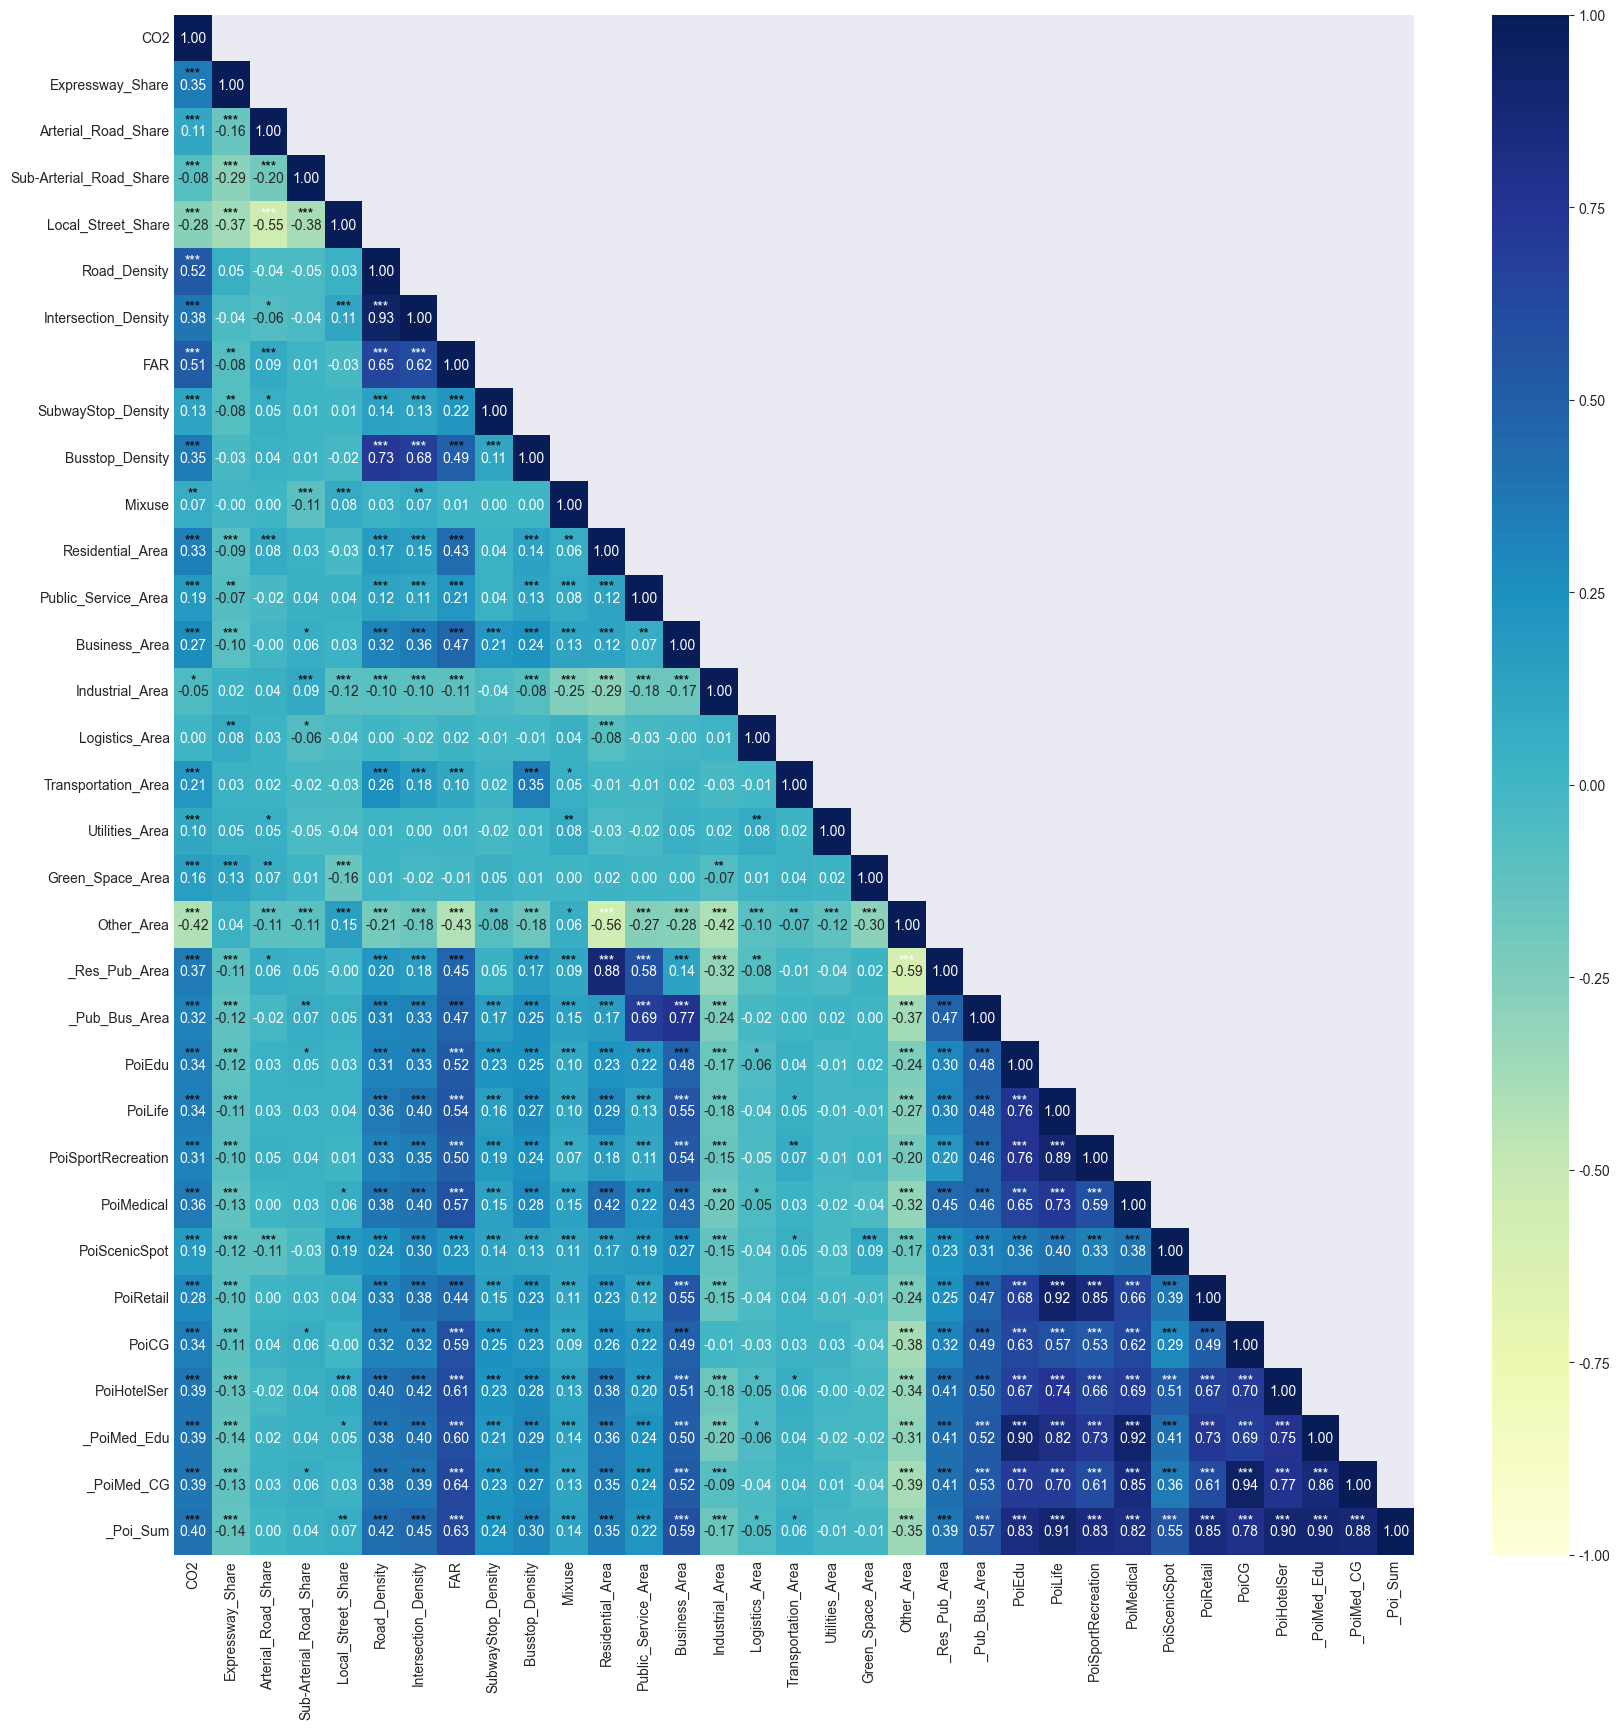

In [4]:
# Calculate correlation matrix
df_corr = df.corr()

# Initialize the figure and axis
fig = plt.figure(figsize=(20, 20))
ax1 = plt.gca()

# Create mask to hide duplicate data in the heatmap
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True  # Mask the upper triangle
mask2 = mask.copy()  # Duplicate mask for later use
mask = (np.flipud(mask) - 1) * (-1)
mask = np.rot90(mask, k=-1)

# Plot heatmap with mask to remove duplicate values
im1 = sns.heatmap(df_corr, annot=True, cmap="YlGnBu", mask=mask, vmax=1, vmin=-1, fmt='.2f', ax=ax1)
ax1.tick_params(axis='both', length=0)  # Remove tick length for better visuals

# Calculate and display correlation significance
rlist = []  # List to store correlation coefficients
plist = []  # List to store p-values
for i in df.columns.values:
    for j in df.columns.values:
        r, p = pearsonr(df[i], df[j])
        rlist.append(r)
        plist.append(p)

# Reshape correlation and p-value arrays
rarr = np.asarray(rlist).reshape(len(df.columns.values), len(df.columns.values))
parr = np.asarray(plist).reshape(len(df.columns.values), len(df.columns.values))
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

# Offsets for annotation positioning
widthx = 0
widthy = -0.15

# Annotate p-values with significance levels on heatmap
for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = parr[int(m), int(n)]
        rv = rarr[int(m), int(n)]
        
        # Apply mask to avoid redundant annotations
        if mask2[int(m), int(n)] < 1.:
            if abs(rv) > 0.5:  # Strong correlation threshold
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='white')
                elif pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='white')
                elif pv < 0.001:
                    print([int(m), int(n)])
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='white')
            else:  # Weaker correlations
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='k')
                elif pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='k')
                elif pv < 0.001:
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='k')

# Display the plot
# Uncomment to save the plot as an SVG file
# plt.savefig(r'D:\000Thesis\002Analysis\20231108Correlation\corr_pvalue.svg')
plt.show()

In [10]:
# def sigmoid(x):
#     return 1 / (1 + math.exp(-x))

In [112]:
# for i in range(df.shape[0]):
#     df.loc[i, 'sum_log'] = math.log(df.loc[i, 'sum'], 10)
# df

In [5]:
df = df.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

In [5]:
df.to_csv(r'D:\000Thesis\002Analysis\Carbon_Emission_Accounting_Test6_Suzhou\Correlation_Analysis_Ver2_220605\TAZ_process_std.csv')

In [6]:
df

CO2  Expressway_Share  Arterial_Road_Share  \
0     0.010132          0.000000             0.557831   
1     0.000817          0.000000             0.000000   
2     0.006950          0.000000             0.290499   
3     0.066206          0.436563             0.218442   
4     0.043231          0.000000             0.893301   
...        ...               ...                  ...   
1587  0.274989          0.000000             0.341445   
1588  0.267206          0.000000             0.000000   
1589  0.355337          0.000000             0.000000   
1590  0.267639          0.000000             0.124559   
1591  0.247795          0.000000             0.137862   

      Sub-Arterial_Road_Share  Local_Street_Share  Road_Density  \
0                    0.000000            0.442169      0.000520   
1                    0.000000            1.000000      0.000924   
2                    0.150378            0.561043      0.000373   
3                    0.142418            0.204396      0.004036   
4                    0.001774            0.104947      0.007399   
...                       ...                 ...           ...   
1587                 0.000000            0.658555      0.202767   
1588                 0.099936            0.901340      0.098803   
1589                 0.060130            0.940638      0.252381   
1590                 0.000000            0.875441      0.184108   
1591                 0.086340            0.776900      0.083114   

      Intersection_Density       FAR  SubwayStop_Density  Busstop_Density  \
0                 0.000083  0.000020            0.000000         0.000228   
1                 0.000099  0.000099            0.000000         0.000260   
2                 0.000093  0.000010            0.000000         0.000123   
3                 0.001093  0.001784            0.000000         0.001017   
4                 0.001369  0.000552            0.000000         0.006187   
...                    ...       ...                 ...              ...   
1587              0.251660  0.193831            0.000000         0.093129   
1588              0.095583  0.154930            0.000000         0.016001   
1589              0.354693  0.250325            0.000000         0.066800   
1590              0.216856  0.335050            0.000000         0.060989   
1591              0.069078  0.218719            0.149056         0.033886   

      ...   PoiLife  PoiSportRecreation  PoiMedical  PoiScenicSpot  PoiRetail  \
0     ...  0.004505            0.034504    0.000881       0.006690   0.010476   
1     ...  0.004350            0.040287    0.000000       0.073513   0.012987   
2     ...  0.002983            0.008777    0.003943       0.005616   0.004539   
3     ...  0.029775            0.009191    0.050187       0.015247   0.036050   
4     ...  0.005372            0.046310    0.000000       0.026592   0.007687   
...   ...       ...                 ...         ...            ...        ...   
1587  ...  0.184365            0.084637    0.232923       0.821352   0.186055   
1588  ...  0.285986            0.208383    0.448633       1.000000   0.274499   
1589  ...  0.876493            0.547417    0.159418       0.605395   0.665832   
1590  ...  0.943393            1.000000    0.242349       0.306777   1.000000   
1591  ...  0.193335            0.153161    0.441573       0.228667   0.145861   

         PoiCG  PoiHotelSer  _PoiMed_Edu  _PoiMed_CG  _Poi_Sum  
0     0.012044     0.010647     0.001421    0.008764  0.014428  
1     0.007042     0.008698     0.000000    0.004881  0.023148  
2     0.021864     0.003939     0.002685    0.017015  0.009643  
3     0.061172     0.019304     0.030321    0.066068  0.042117  
4     0.058556     0.015354     0.004608    0.040590  0.029403  
...        ...          ...          ...         ...       ...  
1587  0.262212     0.571602     0.229761    0.291590  0.449566  
1588  0.364698     0.418974     0.278744    0.464346  0.525702  
1589  0.144223     0.540967     0.2659

In [7]:
df.describe()

CO2  Expressway_Share  Arterial_Road_Share  \
count  1592.000000       1592.000000          1592.000000   
mean      0.139474          0.122667             0.264876   
std       0.146523          0.195208             0.220228   
min       0.000000          0.000000             0.000000   
25%       0.035002          0.000000             0.070570   
50%       0.087563          0.000000             0.240757   
75%       0.203301          0.229049             0.412841   
max       1.000000          1.000000             1.000000   

       Sub-Arterial_Road_Share  Local_Street_Share  Road_Density  \
count              1592.000000         1592.000000   1592.000000   
mean                  0.196077            0.418884      0.034244   
std                   0.207048            0.270985      0.051556   
min                   0.000000            0.000000      0.000000   
25%                   0.000000            0.204475      0.009143   
50%                   0.152168            0.364422      0.020344   
75%                   0.329317            0.589963      0.040971   
max                   1.000000            1.000000      1.000000   

       Intersection_Density          FAR  SubwayStop_Density  Busstop_Density  \
count           1592.000000  1592.000000         1592.000000      1592.000000   
mean               0.019319     0.055504            0.011148         0.015042   
std                0.044755     0.085969            0.059189         0.043694   
min                0.000000     0.000000            0.000000         0.000000   
25%                0.002916     0.000410            0.000000         0.000000   
50%                0.007519     0.022167            0.000000         0.003925   
75%                0.019231     0.077879            0.000000         0.015486   
max                1.000000     1.000000            1.000000         1.000000   

       ...      PoiLife  PoiSportRecreation   PoiMedical  PoiScenicSpot  \
count  ...  1592.000000         1592.000000  1592.000000    1592.000000   
mean   ...     0.034055            0.026392     0.044725       0.024611   
std    ...     0.072668            0.065957     0.090100       0.080607   
min    ...     0.000000            0.000000     0.000000       0.000000   
25%    ...     0.000947            0.000000     0.000000       0.000000   
50%    ...     0.006941            0.003702     0.003140       0.000000   
75%    ...     0.036905            0.023176     0.048304       0.015111   
max    ...     1.000000            1.000000     1.000000       1.000000   

         PoiRetail        PoiCG  PoiHotelSer  _PoiMed_Edu   _PoiMed_CG  \
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000   
mean      0.028018     0.069894     0.065865     0.043042     0.069539   
std       0.065084     0.097398     0.110138     0.080317     0.099613   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000546     0.009178     0.004993     0.000000     0.007429   
50%       0.004568     0.037269     0.027744     0.008842     0.034732   
75%       0.030200     0.091611     0.072220     0.047105     0.086868   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          _Poi_Sum  
count  1592.000000  
mean      0.060392  
std       0.095920  
min       0.000000  
25%       0.006746  
50%       0.025847  
75%       0.071324  
max       1.000000  

[8 rows x 33 columns]

In [8]:
X = df.loc[:, 'Expressway_Share':'PoiHotelSer']
Y = df['CO2']

In [9]:
X

Expressway_Share  Arterial_Road_Share  Sub-Arterial_Road_Share  \
0             0.000000             0.557831                 0.000000   
1             0.000000             0.000000                 0.000000   
2             0.000000             0.290499                 0.150378   
3             0.436563             0.218442                 0.142418   
4             0.000000             0.893301                 0.001774   
...                ...                  ...                      ...   
1587          0.000000             0.341445                 0.000000   
1588          0.000000             0.000000                 0.099936   
1589          0.000000             0.000000                 0.060130   
1590          0.000000             0.124559                 0.000000   
1591          0.000000             0.137862                 0.086340   

      Local_Street_Share  Road_Density  Intersection_Density       FAR  \
0               0.442169      0.000520              0.000083  0.000020   
1               1.000000      0.000924              0.000099  0.000099   
2               0.561043      0.000373              0.000093  0.000010   
3               0.204396      0.004036              0.001093  0.001784   
4               0.104947      0.007399              0.001369  0.000552   
...                  ...           ...                   ...       ...   
1587            0.658555      0.202767              0.251660  0.193831   
1588            0.901340      0.098803              0.095583  0.154930   
1589            0.940638      0.252381              0.354693  0.250325   
1590            0.875441      0.184108              0.216856  0.335050   
1591            0.776900      0.083114              0.069078  0.218719   

      SubwayStop_Density  Busstop_Density    Mixuse  ...  _Res_Pub_Area  \
0               0.000000         0.000228  0.459338  ...       0.001112   
1               0.000000         0.000260  0.000001  ...       0.000000   
2               0.000000         0.000123  0.459815  ...       0.013260   
3               0.000000         0.001017  0.536052  ...       0.026037   
4               0.000000         0.006187  0.686131  ...       0.069984   
...                  ...              ...       ...  ...            ...   
1587            0.000000         0.093129  0.658253  ...       0.379935   
1588            0.000000         0.016001  0.613162  ...       0.374121   
1589            0.000000         0.066800  0.451665  ...       0.242453   
1590            0.000000         0.060989  0.301758  ...       0.017298   
1591            0.149056         0.033886  0.558841  ...       0.321776   

      _Pub_Bus_Area    PoiEdu   PoiLife  PoiSportRecreation  PoiMedical  \
0          0.006714  0.001871  0.004505            0.034504    0.000881   
1          0.001164  0.000000  0.004350            0.040287    0.000000   
2          0.020207  0.001256  0.002983            0.008777    0.003943   
3          0.042730  0.008526  0.029775            0.009191    0.050187   
4          0.032756  0.008923  0.005372            0.046310    0.000000   
...             ...       ...       ...                 ...         ...   
1587       0.415047  0.211992  0.184365            0.084637    0.232923   
1588       0.414262  0.091132  0.285986            0.208383    0.448633   
1589       0.468573  0.355476  0.876493            0.547417    0.159418   
1590       0.695312  0.217304  0.943393            1.000000    0.242349   
1591       0.386214  0.085250  0.193335            0.153161    0.441573   

      PoiScenicSpot  PoiRetail     PoiCG  PoiHotelSer  
0          0.006690   0.010476  0.012044     0.010647  
1          0.073513   0.012987  0.007042     0.008698  
2          0.005616   0.004539  0.021864     0.003939  
3          0.015247   0.036050  0.061172     0.019304  
4          0.026592   0.007687  0.058556     0.015354  
...             ...        ...       ...          ...  
1587       0.821352   0.186055  0.262212     0.571602  
15

In [10]:
type(Y)
print(Y)

0       0.010132
1       0.000817
2       0.006950
3       0.066206
4       0.043231
          ...   
1587    0.274989
1588    0.267206
1589    0.355337
1590    0.267639
1591    0.247795
Name: CO2, Length: 1592, dtype: float64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1432, 29) (160, 29) (1432,) (160,)


In [12]:
X_train

Expressway_Share  Arterial_Road_Share  Sub-Arterial_Road_Share  \
737           0.000000             0.000000                 0.575792   
713           0.000000             0.000000                 0.064927   
1556          0.000000             0.103680                 0.354117   
1403          0.000000             0.484080                 0.000538   
1015          0.000000             0.476424                 0.154616   
...                ...                  ...                      ...   
763           0.000000             0.000000                 0.000000   
835           0.000000             0.040115                 0.869594   
1216          0.122697             0.514315                 0.000000   
559           0.312008             0.055506                 0.188782   
684           0.276629             0.000000                 0.001698   

      Local_Street_Share  Road_Density  Intersection_Density       FAR  \
737             0.431563      0.033428              0.022336  0.000000   
713             0.935902      0.303917              0.341683  0.177574   
1556            0.546726      0.019786              0.015093  0.063194   
1403            0.515389      0.016808              0.008649  0.049178   
1015            0.370935      0.021830              0.009860  0.115614   
...                  ...           ...                   ...       ...   
763             1.000000      0.012528              0.003444  0.000000   
835             0.101398      0.039780              0.016349  0.002988   
1216            0.362988      0.017732              0.003501  0.016760   
559             0.446116      0.031315              0.011010  0.091574   
684             0.721695      0.006833              0.002462  0.000025   

      SubwayStop_Density  Busstop_Density    Mixuse  ...  _Res_Pub_Area  \
737             0.000000         0.026175  0.000003  ...       0.000000   
713             0.000000         0.635932  0.459825  ...       0.385049   
1556            0.070022         0.015918  0.539174  ...       0.356663   
1403            0.000000         0.000000  0.690488  ...       0.257110   
1015            0.057180         0.025998  0.532270  ...       0.335151   
...                  ...              ...       ...  ...            ...   
763             0.000000         0.000000  1.000000  ...       0.000000   
835             0.000000         0.068969  0.022605  ...       0.704945   
1216            0.000000         0.000000  0.545080  ...       0.035573   
559             0.000000         0.000000  0.291399  ...       0.061205   
684             0.000000         0.006492  0.102181  ...       0.000000   

      _Pub_Bus_Area    PoiEdu   PoiLife  PoiSportRecreation  PoiMedical  \
737        0.006861  0.000000  0.002127            0.012691    0.000000   
713        0.301307  0.241233  0.030259            0.000000    0.070996   
1556       0.164167  0.086764  0.069653            0.029692    0.087549   
1403       0.039228  0.016498  0.009106            0.004940    0.009711   
1015       0.062012  0.132003  0.056164            0.031621    0.149179   
...             ...       ...       ...                 ...         ...   
763        0.000000  0.000000  0.000000            0.000000    0.000000   
835        0.704945  0.007022  0.000000            0.000000    0.000000   
1216       0.035573  0.000000  0.000762            0.000000    0.000000   
559        0.058438  0.017508  0.032502            0.020970    0.061832   
684        0.000000  0.000000  0.000611            0.000000    0.000000   

      PoiScenicSpot  PoiRetail     PoiCG  PoiHotelSer  
737        0.000000   0.000000  0.005979     0.000000  
713        0.000000   0.077796  0.034029     0.220968  
1556       0.000000   0.029866  0.254606     0.218804  
1403       0.276581   0.006157  0.026410     0.017864  
1015       0.023605   0.017547  0.071613     0.063293  
...             ...        ...       ...          ...  
763        0.000000   0.000000  0.000000     0.000000  
83

# 2 XGBoost Regression

## Randomized Search

In [23]:
# 2. Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],  # Maximum depth of each tree
    'n_estimators': [30, 50, 100, 300, 500, 1000, 2000],  # Number of trees
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.01, 0.02, 0.03, 0.05, 0.5],  # Learning rate
    # 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction for splits
    'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 100],  # L1 regularization term
    'reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1, 100],  # L2 regularization term
    # 'min_child_weight': [2, 3, 4, 5, 6, 7, 8],  # Minimum sum of weights of all observations for child nodes
    # 'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  # Subsample ratio of columns when building each tree
    'subsample': [0.6, 0.7, 0.8, 0.9]  # Subsample ratio of the training instances
}

# 3. Perform randomized search and print the "best" parameters
gsearch1 = RandomizedSearchCV(xgb.XGBRegressor(seed=27), param_grid, cv=5)
gsearch1.fit(X_train, y_train)
print("Best Parameters:", gsearch1.best_params_)
print("Best Score:", gsearch1.best_score_)

# 4. Predict on the test set using the best parameters
y_test_pred = gsearch1.predict(X_test)

# 5. Calculate and print the RMSE for the test set
rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

best_score_: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.001, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05} 0.6878660969249737
rmse: 0.0790263079435268


In [18]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


best_score_: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 2000, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.02, 'gamma': 0.1, 'colsample_bytree': 0.8} 0.4809676363445484
rmse: 0.10293854777589843

In [13]:
clf = xgb.XGBRegressor(subsample=0.6,
                       reg_lambda=0.01,
                       reg_alpha=0.1,
                       n_estimators=500,
#                        min_child_weight=2,
                       max_depth=8,
                       learning_rate=0.02,
#                        gamma=0.1,
#                        colsample_bytree=0.8
                      )
xgb_model = clf.fit(X_train, y_train)  # Training model

y_pred = xgb_model.predict(X_test)

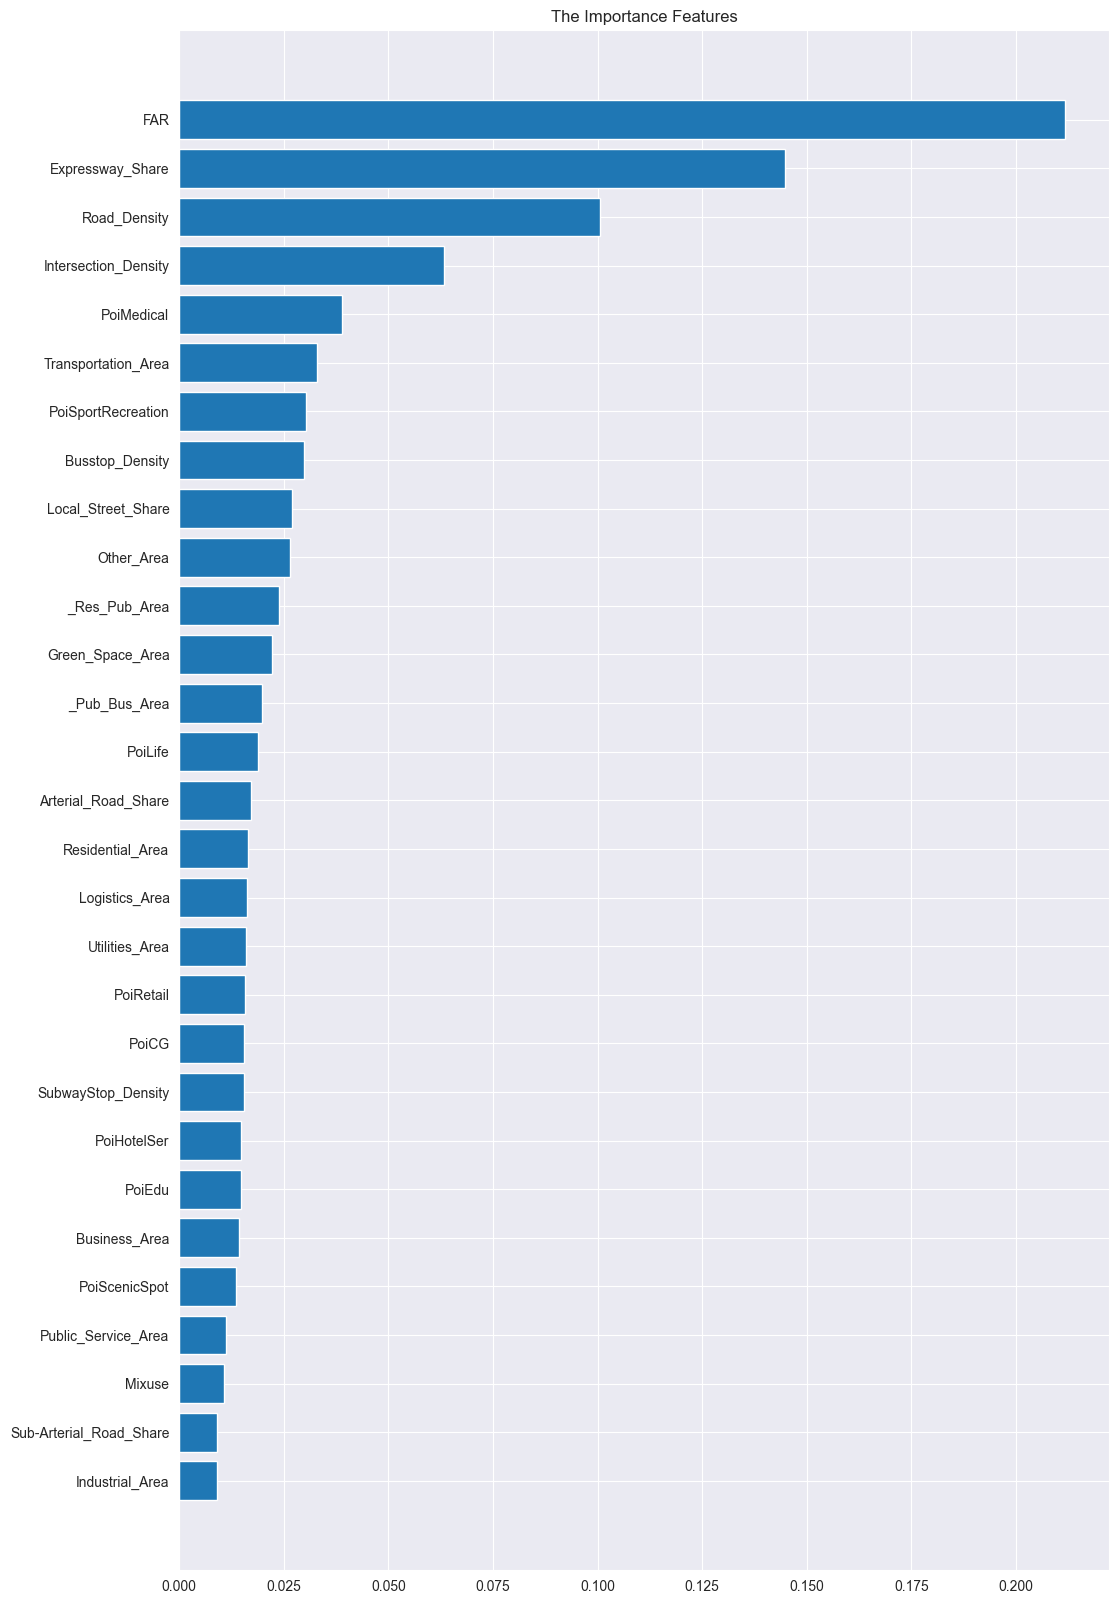

In [14]:
fea = df.columns[1:30]
b = pd.DataFrame()
b['feature'] = fea
b['importance'] = xgb_model.feature_importances_
b = b.sort_values('importance',ascending = True)
plt.figure(figsize=(12,20))
plt.barh(b['feature'],b['importance'])
plt.title('The Importance Features')
# plt.savefig(r'D:\000Thesis\002Analysis\20231103Correlation\xgboost_importance_features.svg')
plt.show()

In [15]:
b = b.sort_values('importance',ascending = False)
b
b.to_csv(r'D:\000Thesis\002Analysis\20231108Correlation\xgboost_importance.csv')

## Model evaluation

In [47]:
# Predict on the test set
ans = xgb_model.predict(X_test)
print(type(ans))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, ans)  # Mean Squared Error
mae = mean_absolute_error(y_test, ans)  # Mean Absolute Error
# max_err = max_error(y_test, ans)  # Uncomment if max error is needed
r2 = r2_score(y_test, ans)  # R-squared Score
evs = explained_variance_score(y_test, ans)  # Explained Variance Score

# Print metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)
# print('Max Error:', max_err)  # Uncomment to display max error
print('Explained Variance Score:', evs)

<class 'numpy.ndarray'>
mean_squared_error: 0.006242997411528106
mean_absolute_error: 0.05292694964089082
r2_score: 0.699068975586393
explained_variance_score: 0.7002492136403762


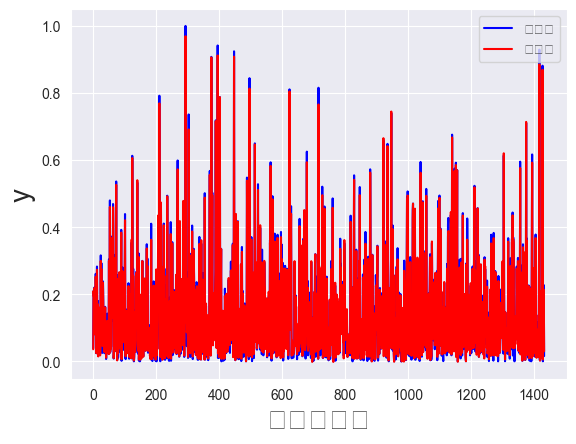

In [48]:
# Make predictions on training and test sets
y_pred = xgb_model.predict(X_train)
y_pred2 = xgb_model.predict(X_test)

# Plot actual vs. predicted values for the training set
plt.figure()
plt.plot(range(len(y_train[0:7433])), y_train[0:7433], 'b', label="Actual Values")
plt.plot(range(len(y_pred[0:7433])), y_pred[0:7433], 'r', label="Predicted Values")
plt.legend(loc="upper right")
plt.xlabel("Training Set Index", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.show()

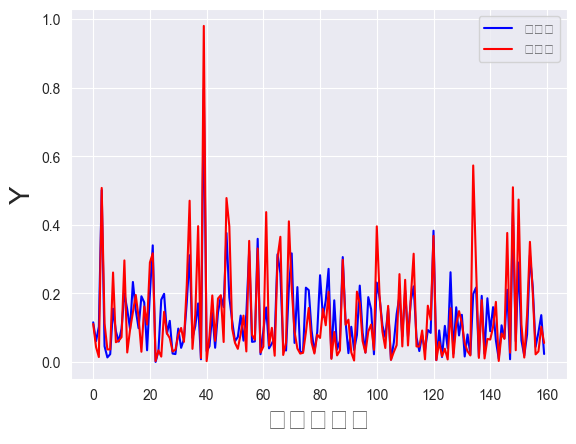

In [49]:
# Plot actual vs. predicted values for the test set
plt.figure()
plt.plot(range(len(y_pred2[0:1859])), y_pred2[0:1859], 'b', label="Predicted Values")
plt.plot(range(len(y_test[0:1859])), y_test[0:1859], 'r', label="Actual Values")
plt.legend(loc="upper right")
plt.xlabel("Test Set Index", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.show()

In [1]:
def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

# Calculate metrics for the training set
RMSE = mean_squared_error(y_train, y_pred) ** 0.5
print('Training Set Metrics (RMSE, MAE, MSE, MAPE):')
print('RMSE:', RMSE)
print('MAE:', mean_absolute_error(y_train, y_pred))
print('MSE:', mean_squared_error(y_train, y_pred))
print('MAPE:', mape(y_train, y_pred))

# Calculate metrics for the test set
RMSE2 = mean_squared_error(y_test, y_pred2) ** 0.5
print('\nTest Set Metrics (RMSE, MAE, MSE, MAPE):')
print('RMSE:', RMSE2)
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))
print('MAPE:', mape(y_test, y_pred2))

## PDPs

In [24]:
X_train.head(2)

Expressway_Share  Arterial_Road_Share  Sub-Arterial_Road_Share  \
737               0.0                  0.0                 0.575792   
713               0.0                  0.0                 0.064927   

     Local_Street_Share  Road_Density  Intersection_Density       FAR  \
737            0.431563      0.033428              0.022336  0.000000   
713            0.935902      0.303917              0.341683  0.177574   

     SubwayStop_Density  Busstop_Density    Mixuse  ...  PoiSportRecreation  \
737                 0.0         0.026175  0.000003  ...            0.012691   
713                 0.0         0.635932  0.459825  ...            0.000000   

     PoiMedical  PoiScenicSpot  PoiRetail     PoiCG  PoiHotelSer  _PoiMed_Edu  \
737    0.000000            0.0   0.000000  0.005979     0.000000      0.00000   
713    0.070996            0.0   0.077796  0.034029     0.220968      0.16124   

     _PoiMed_Ret  _PoiEdu_Ret  _PoiMed_CG  
737     0.000000     0.000000    0.004144  
713     0.101049     0.178967    0.057065  

[2 rows x 33 columns]

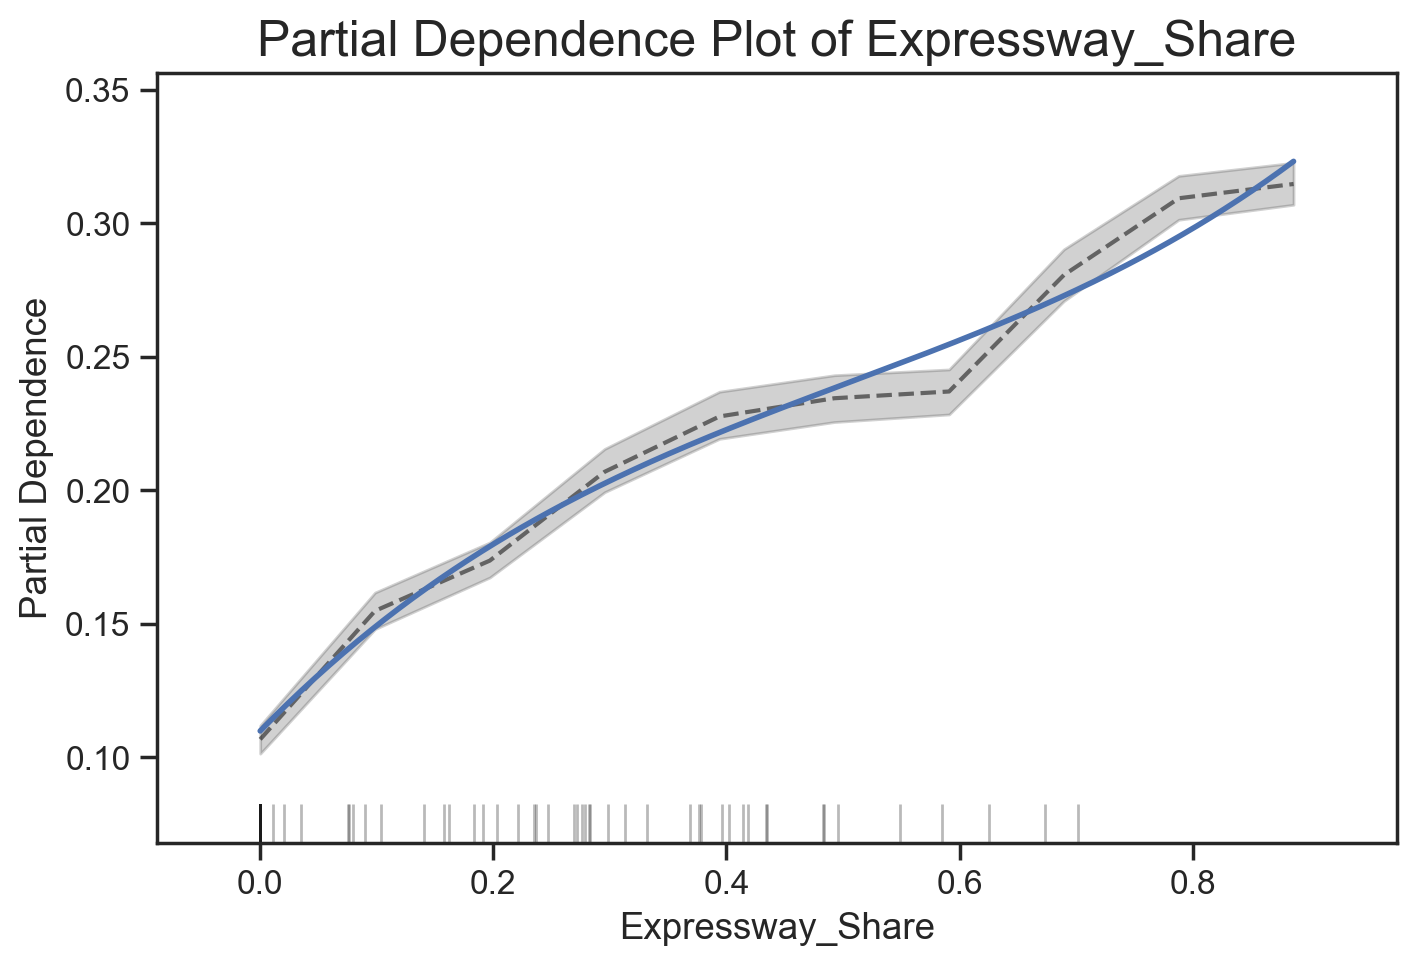

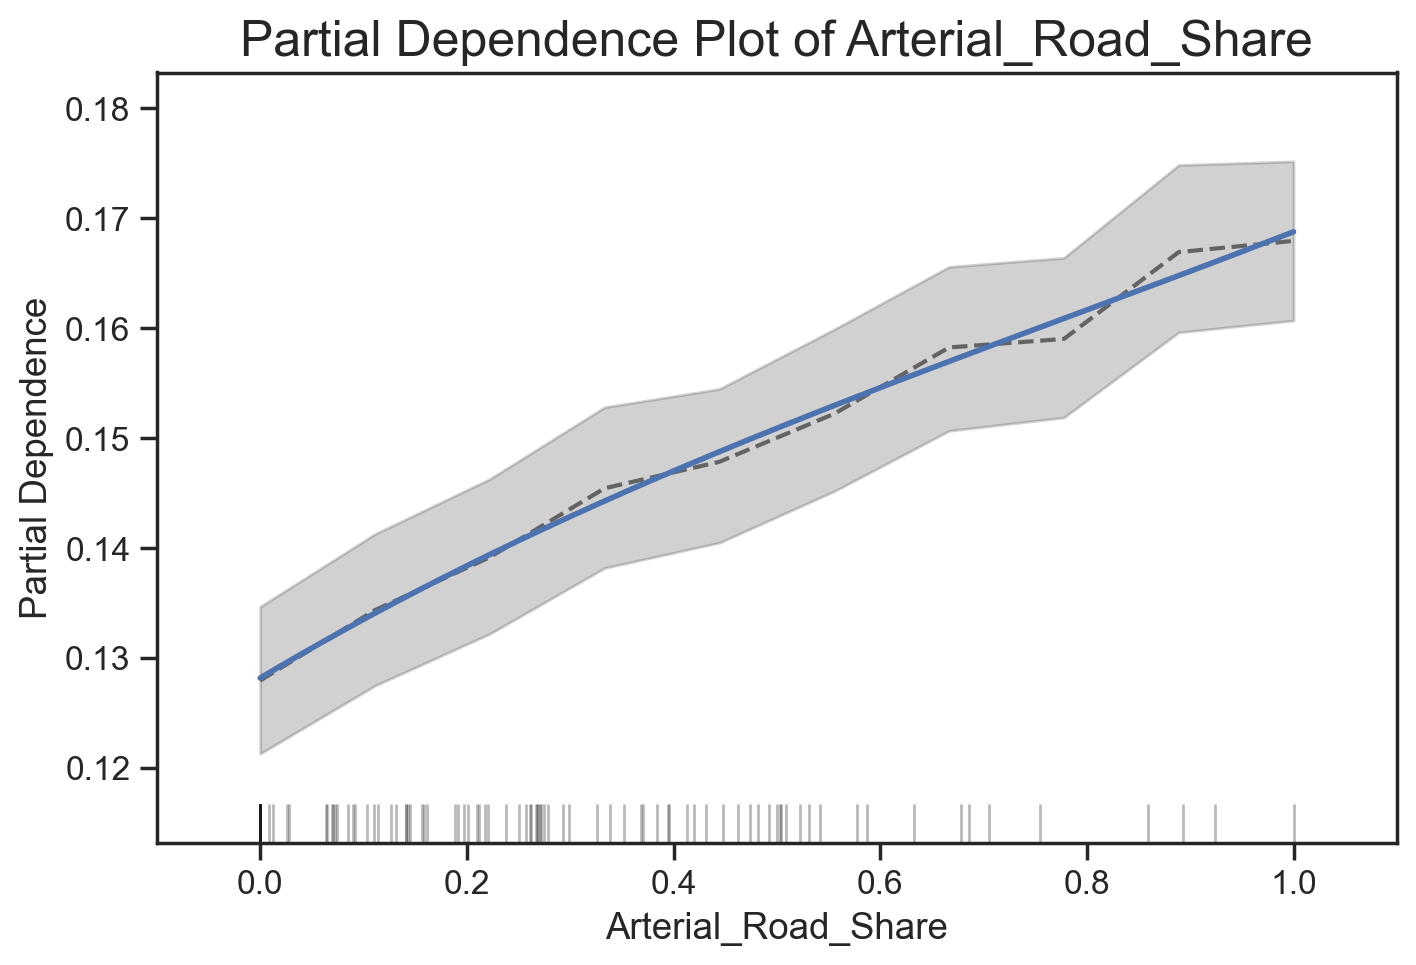

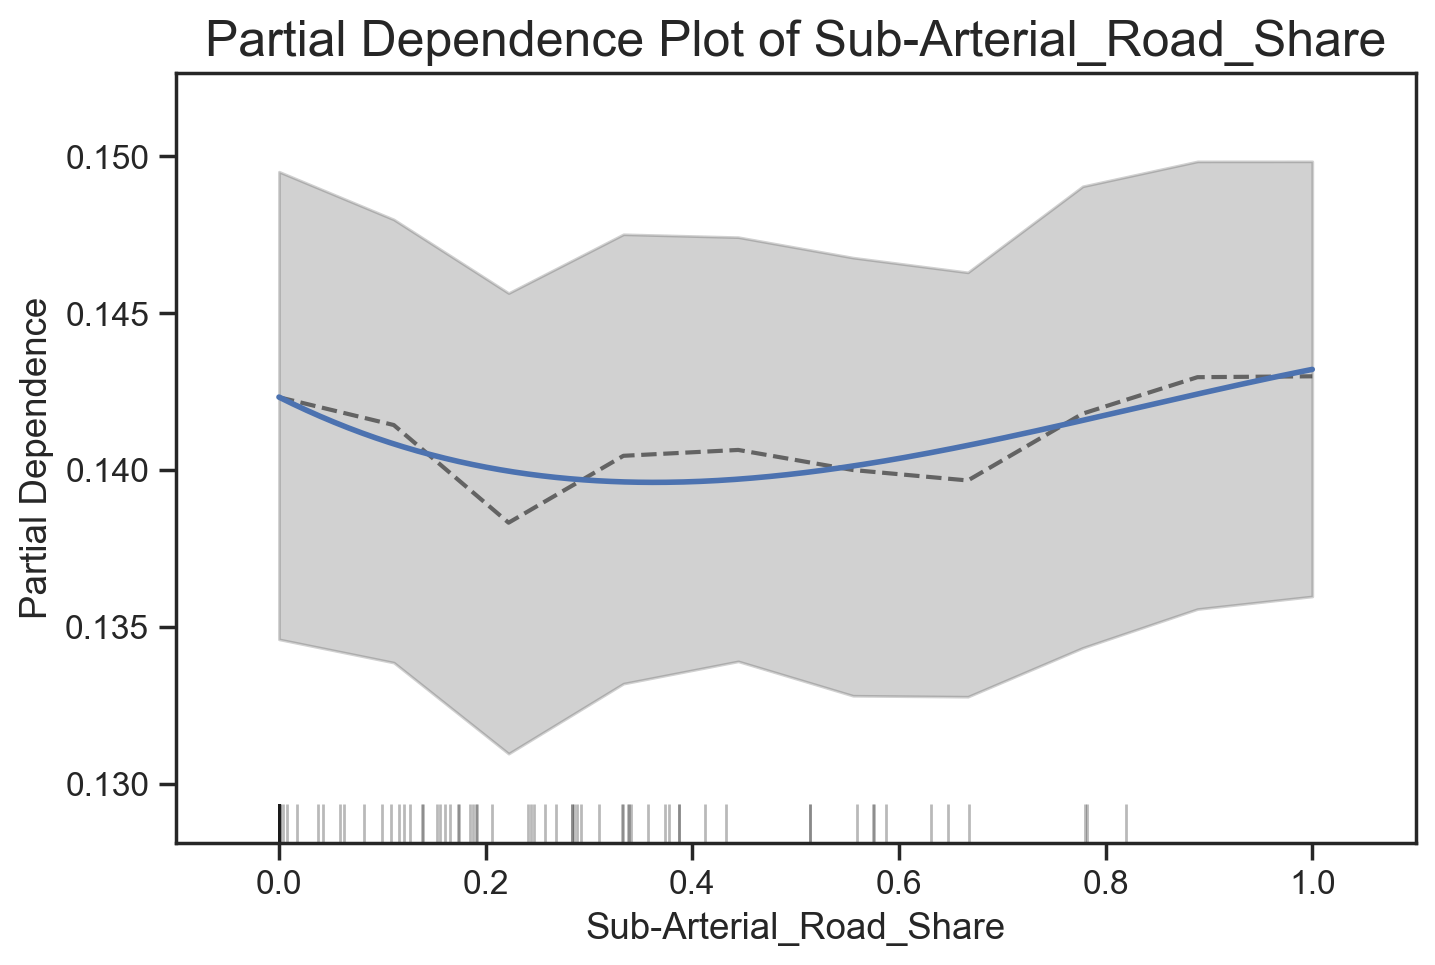

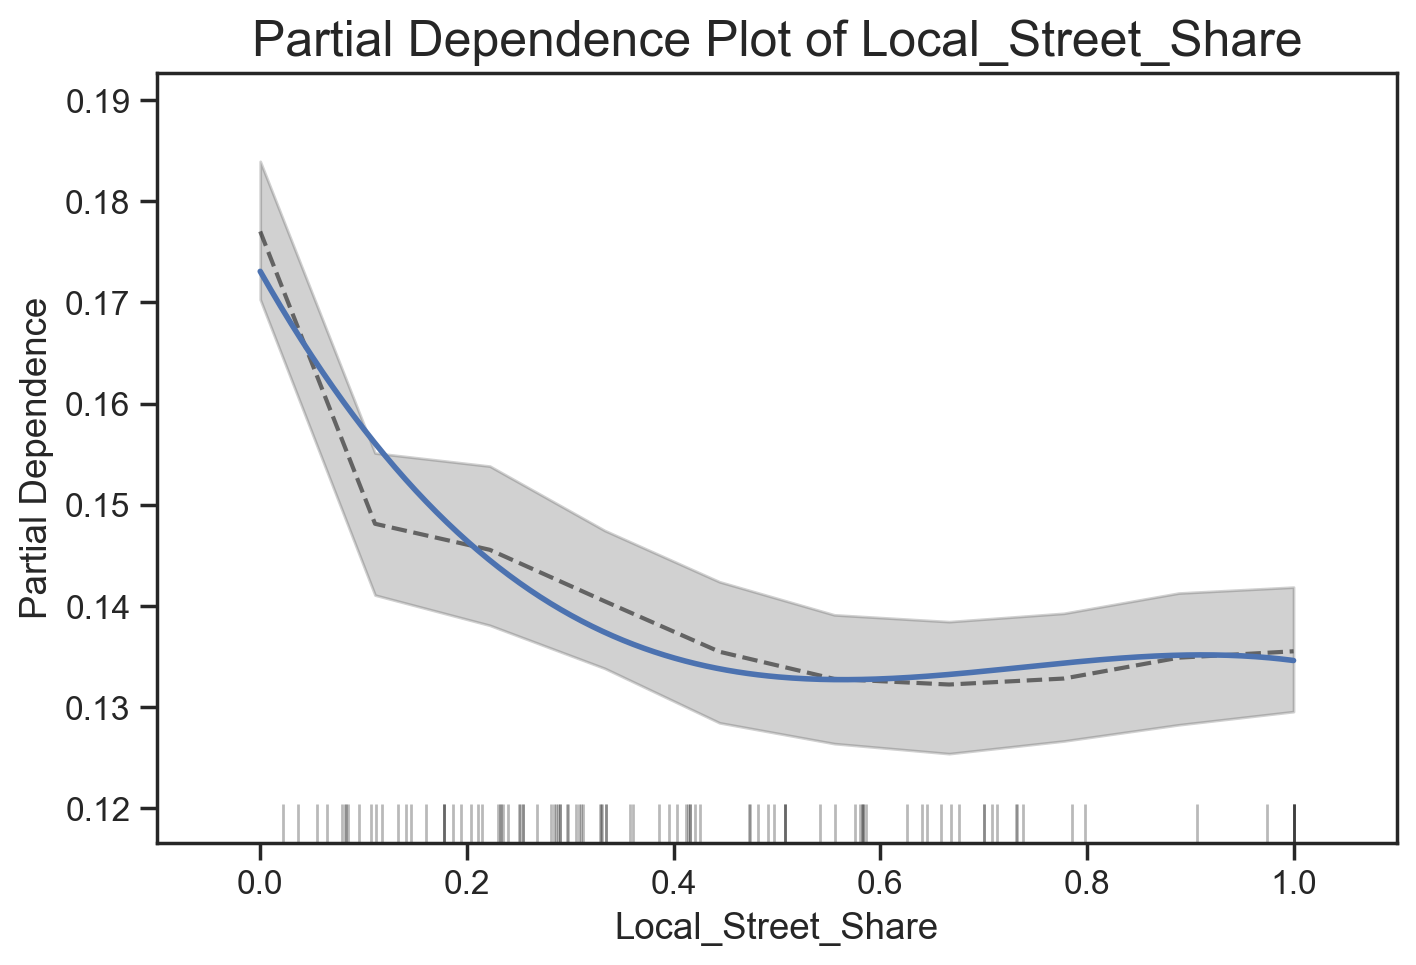

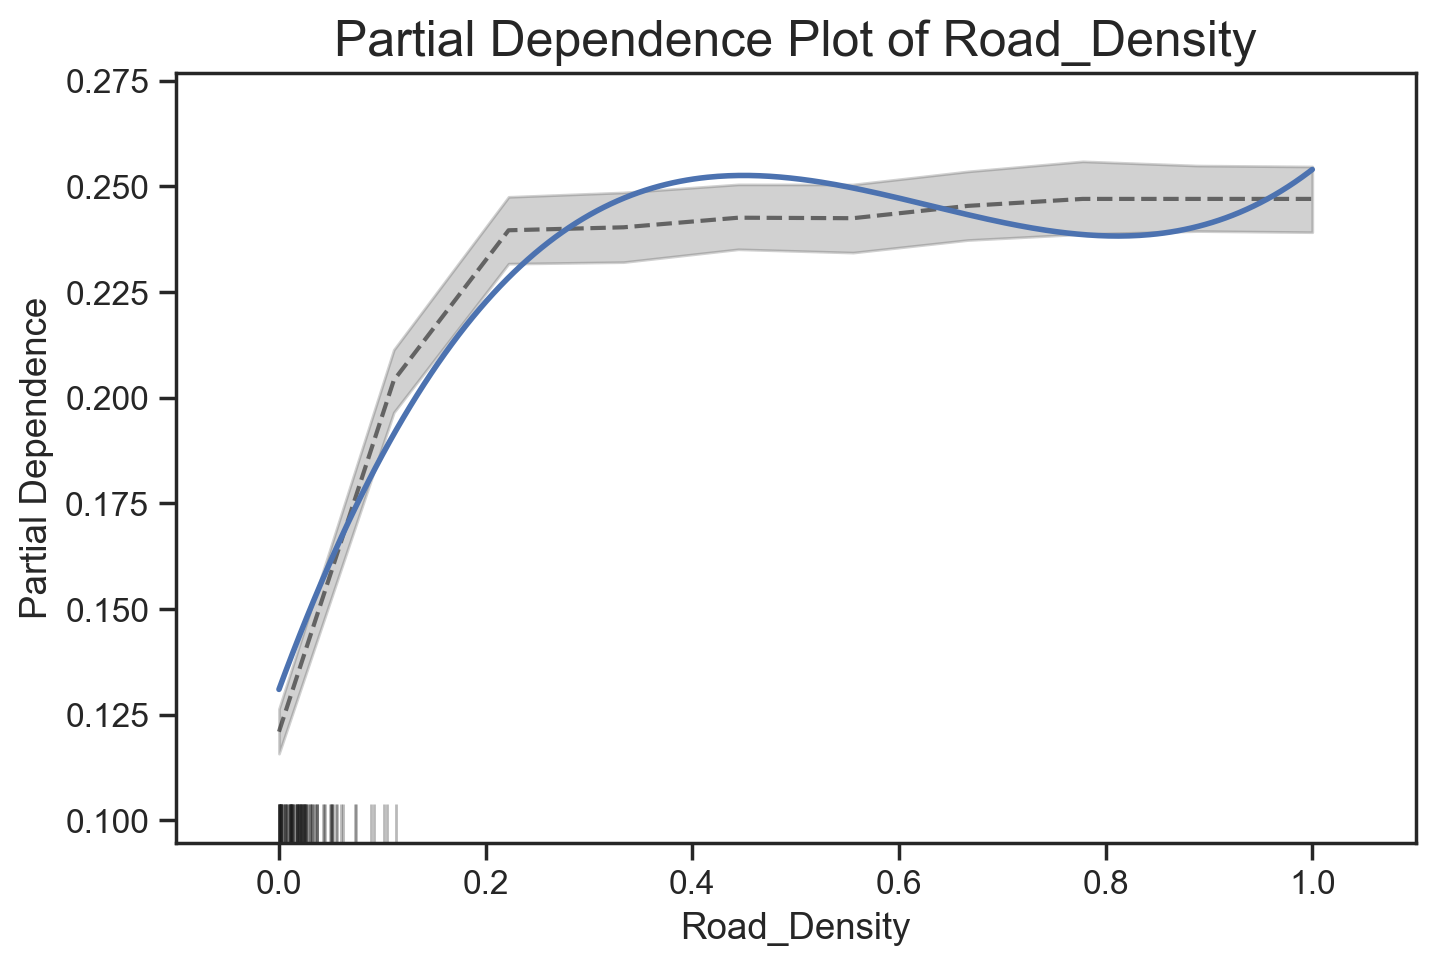

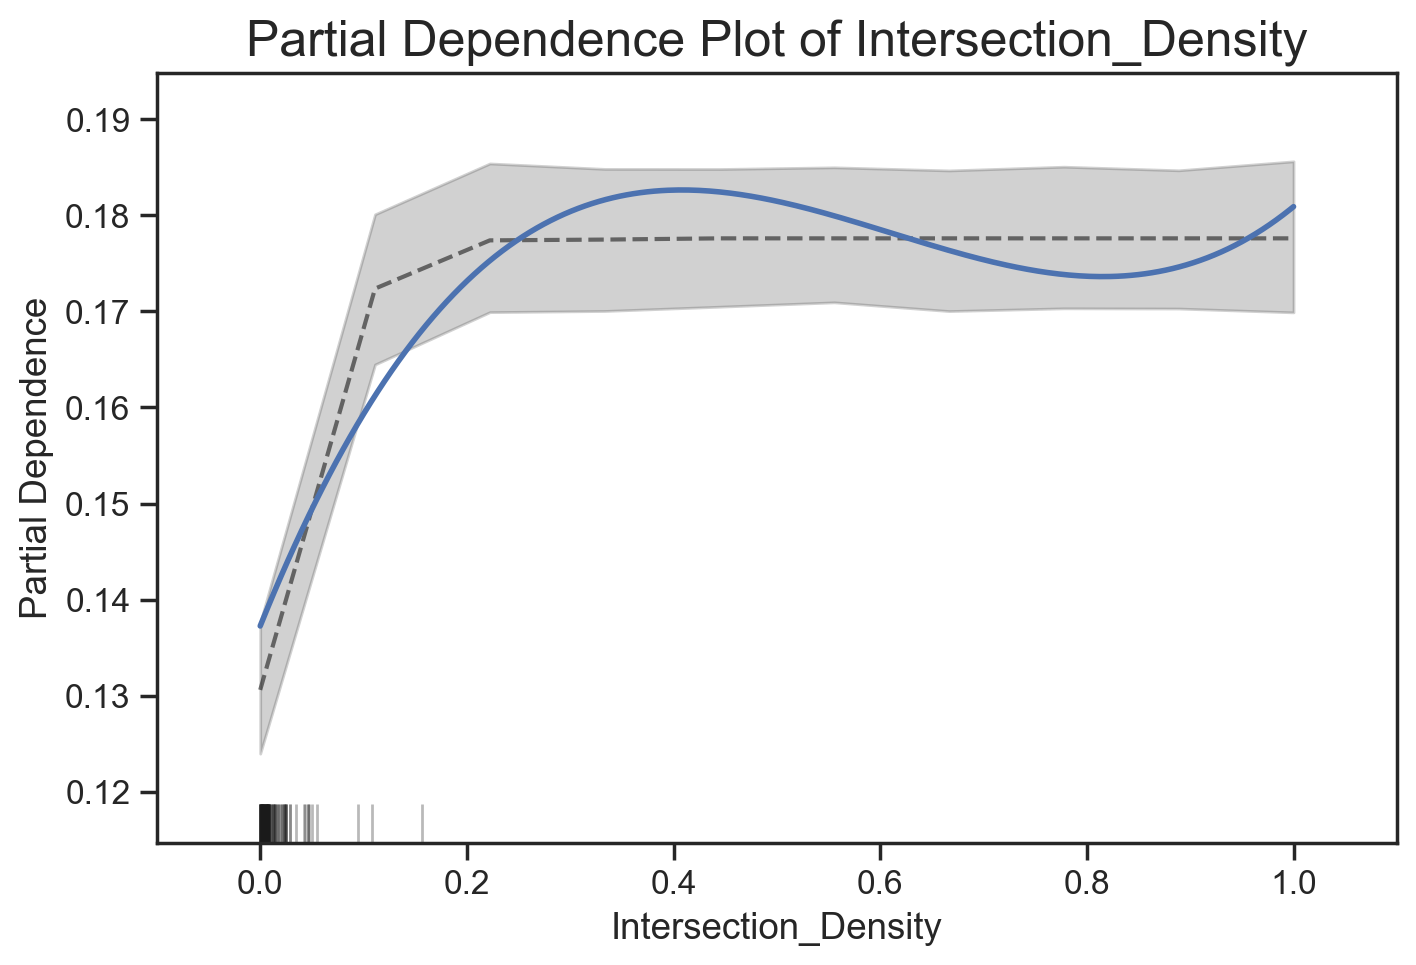

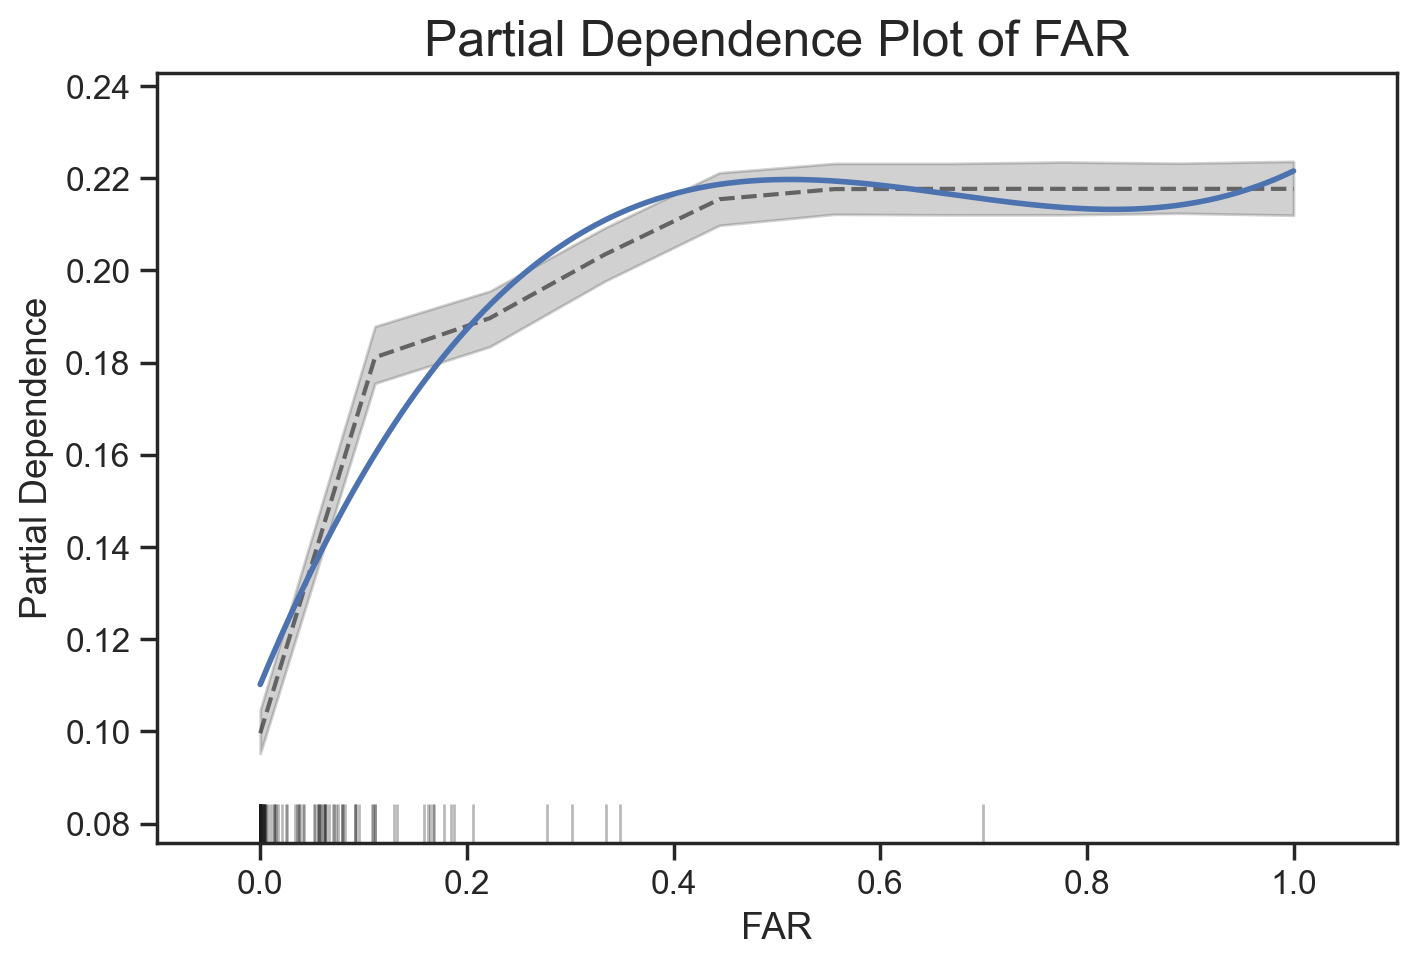

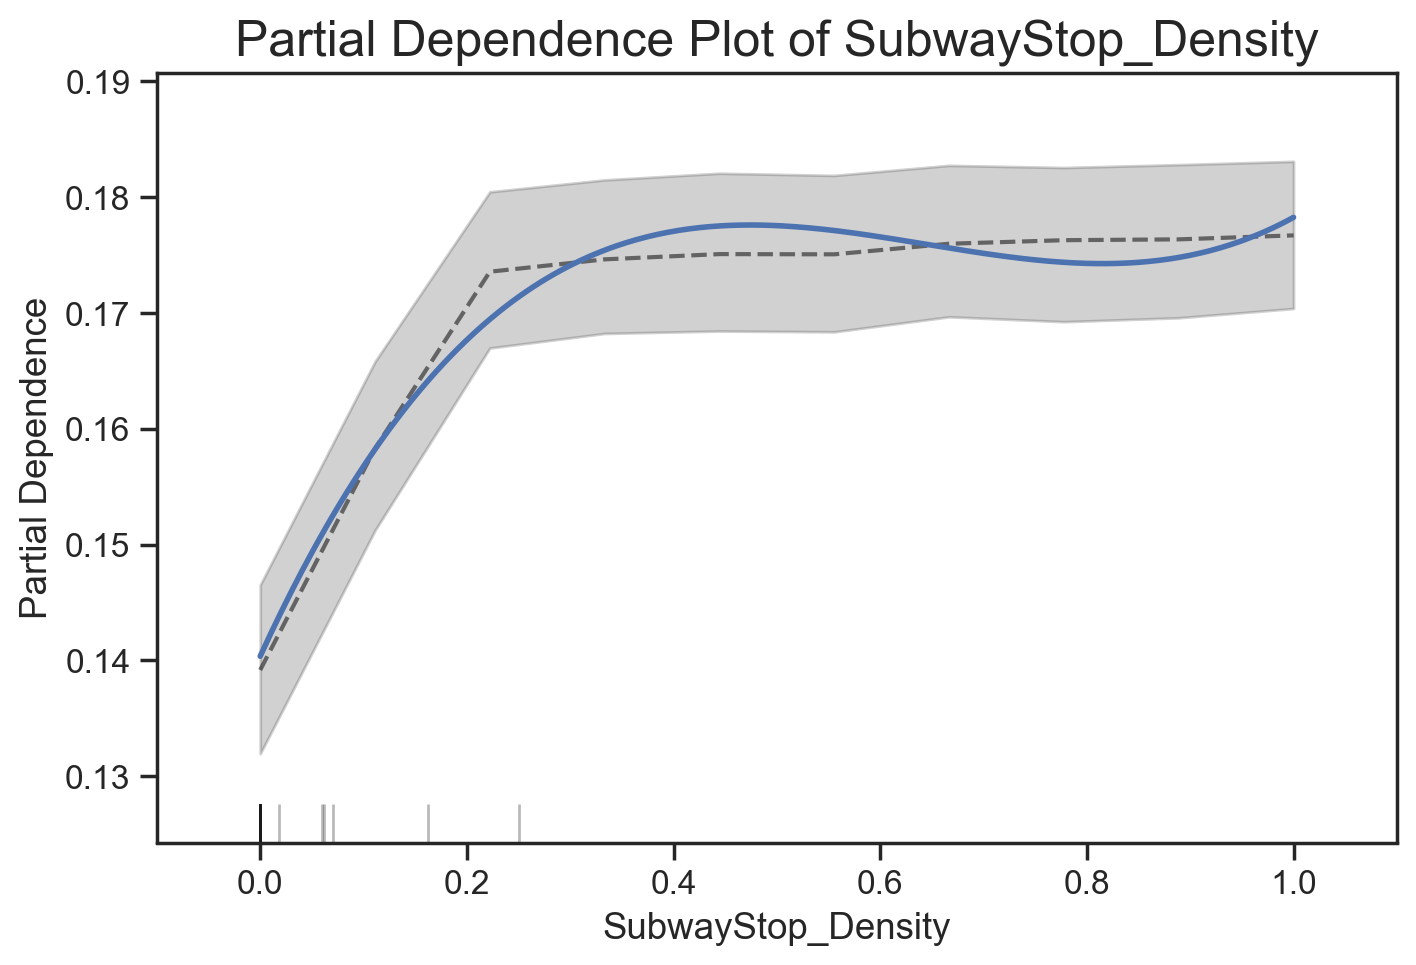

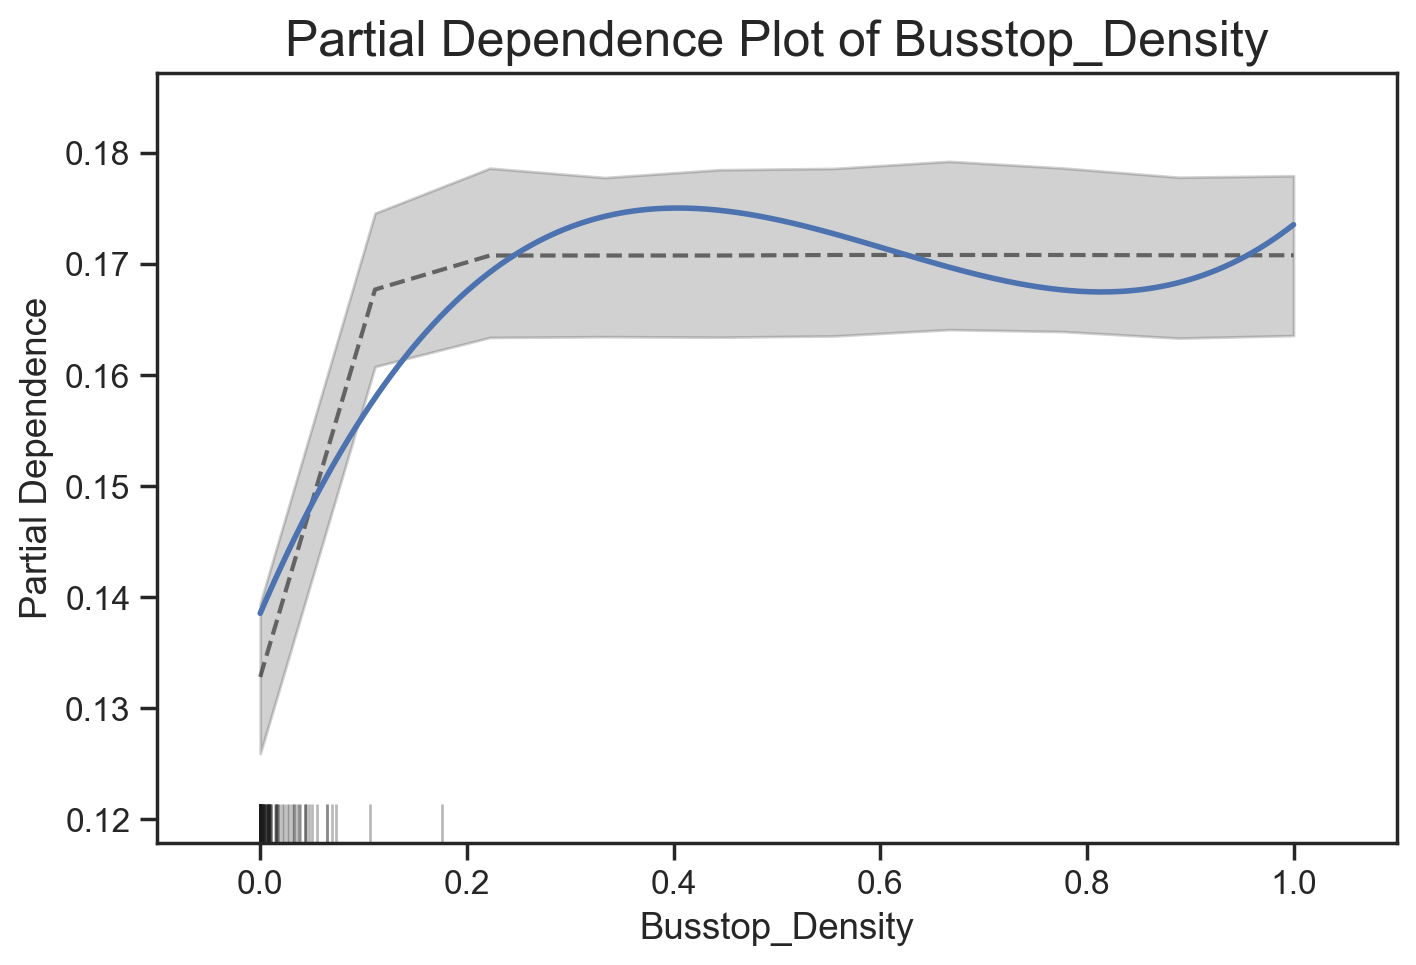

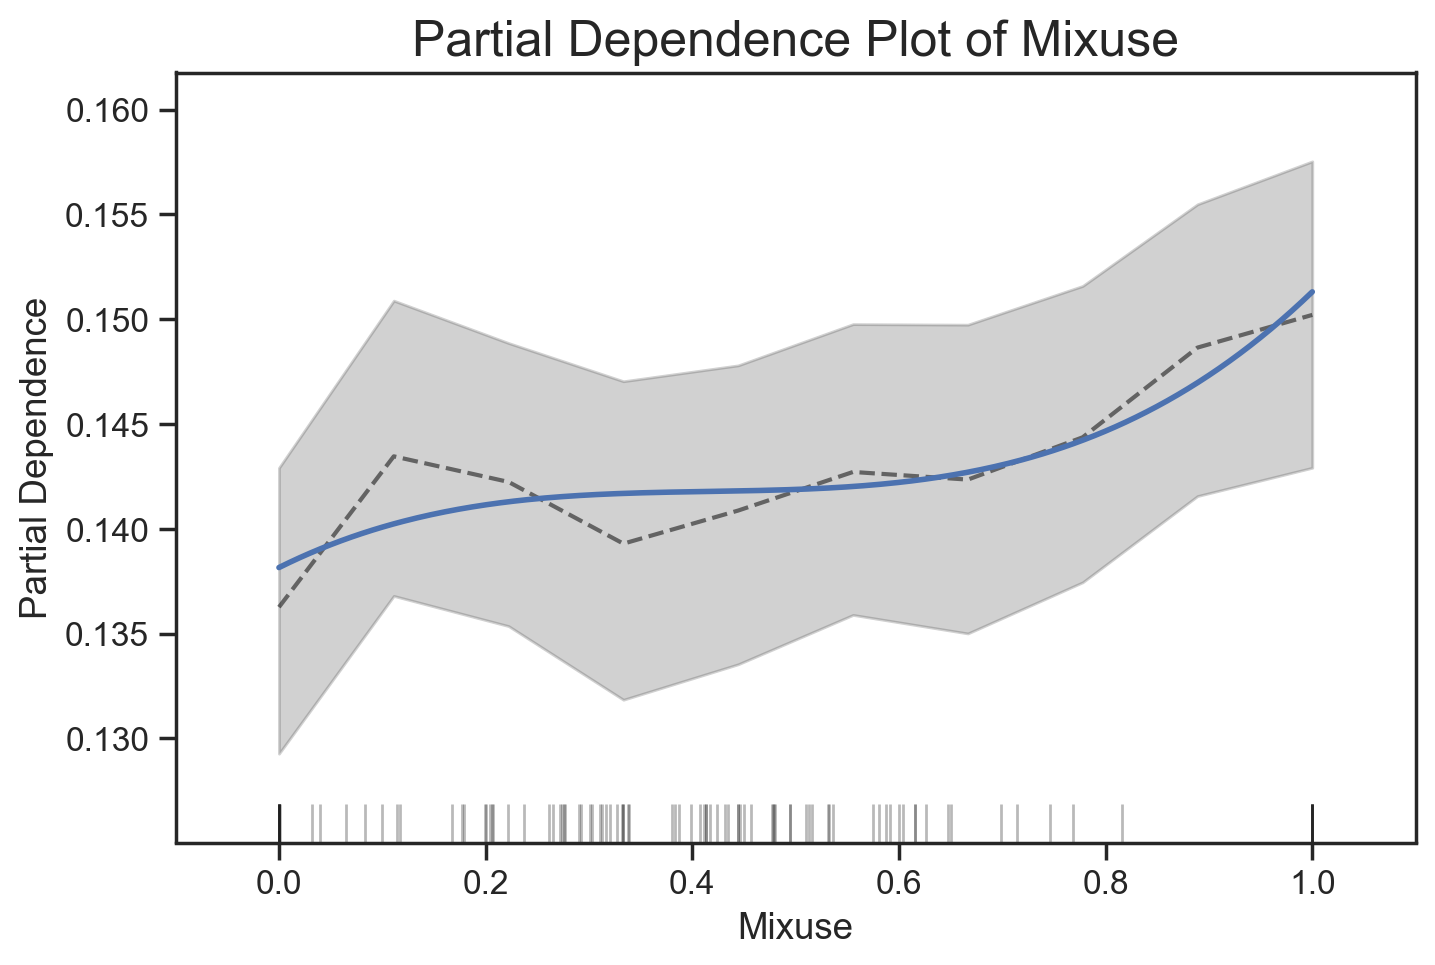

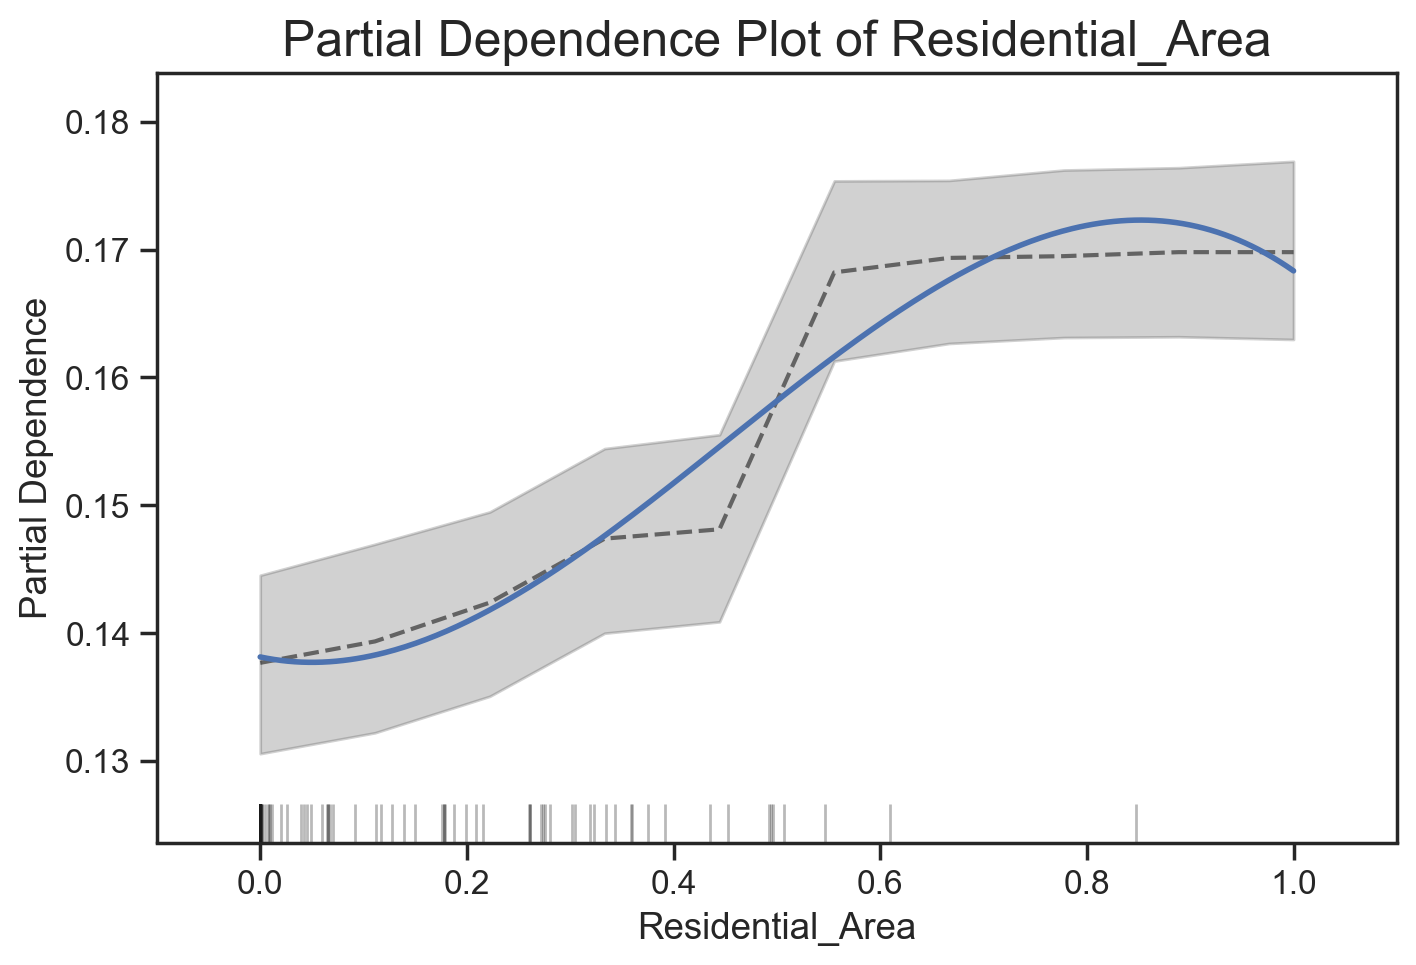

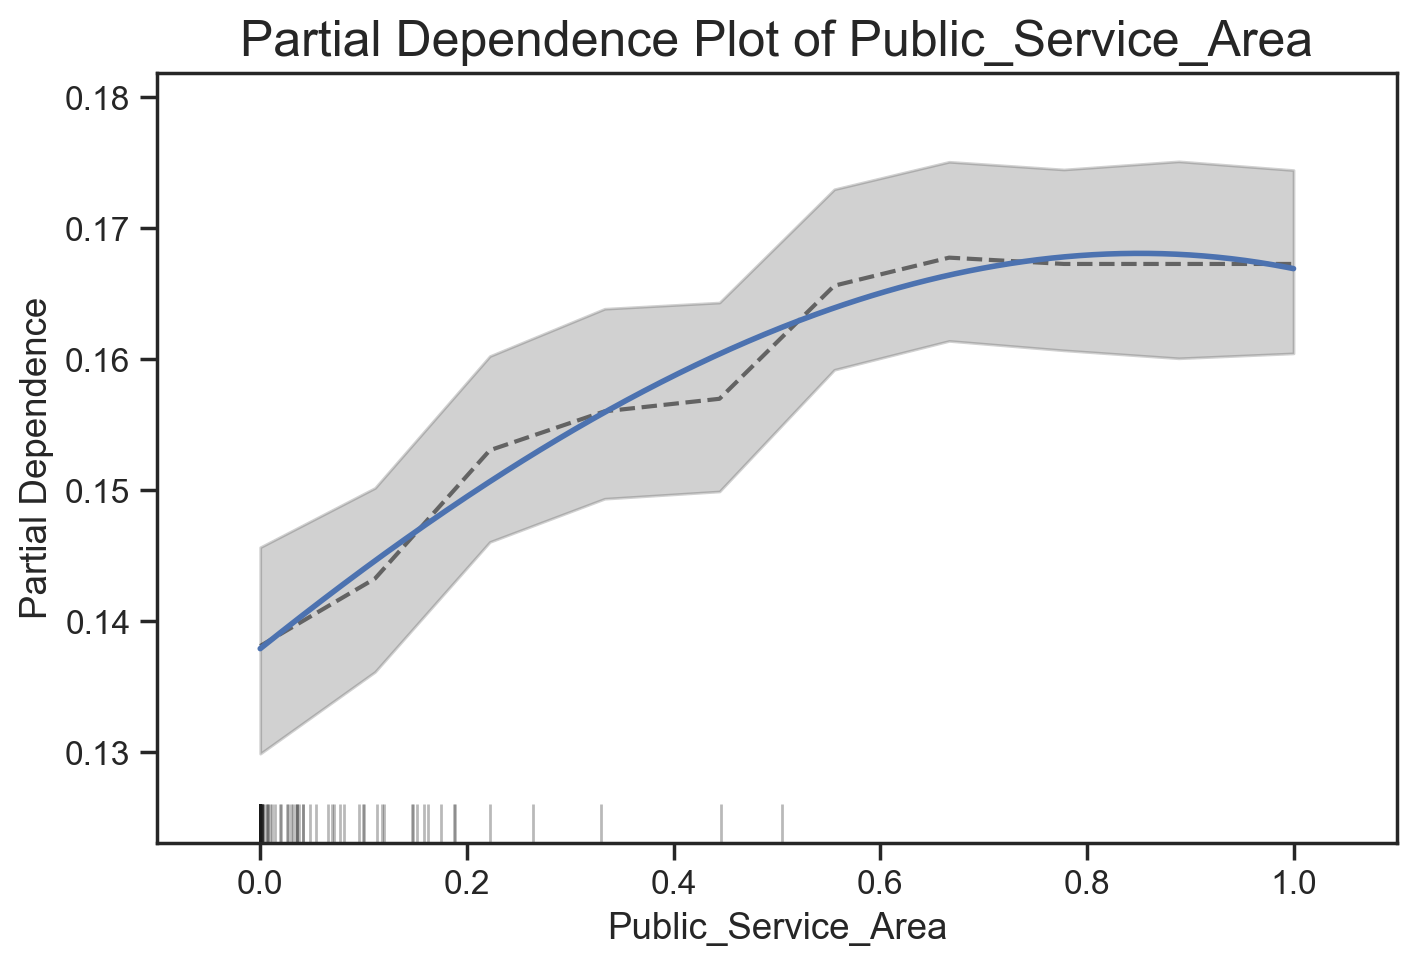

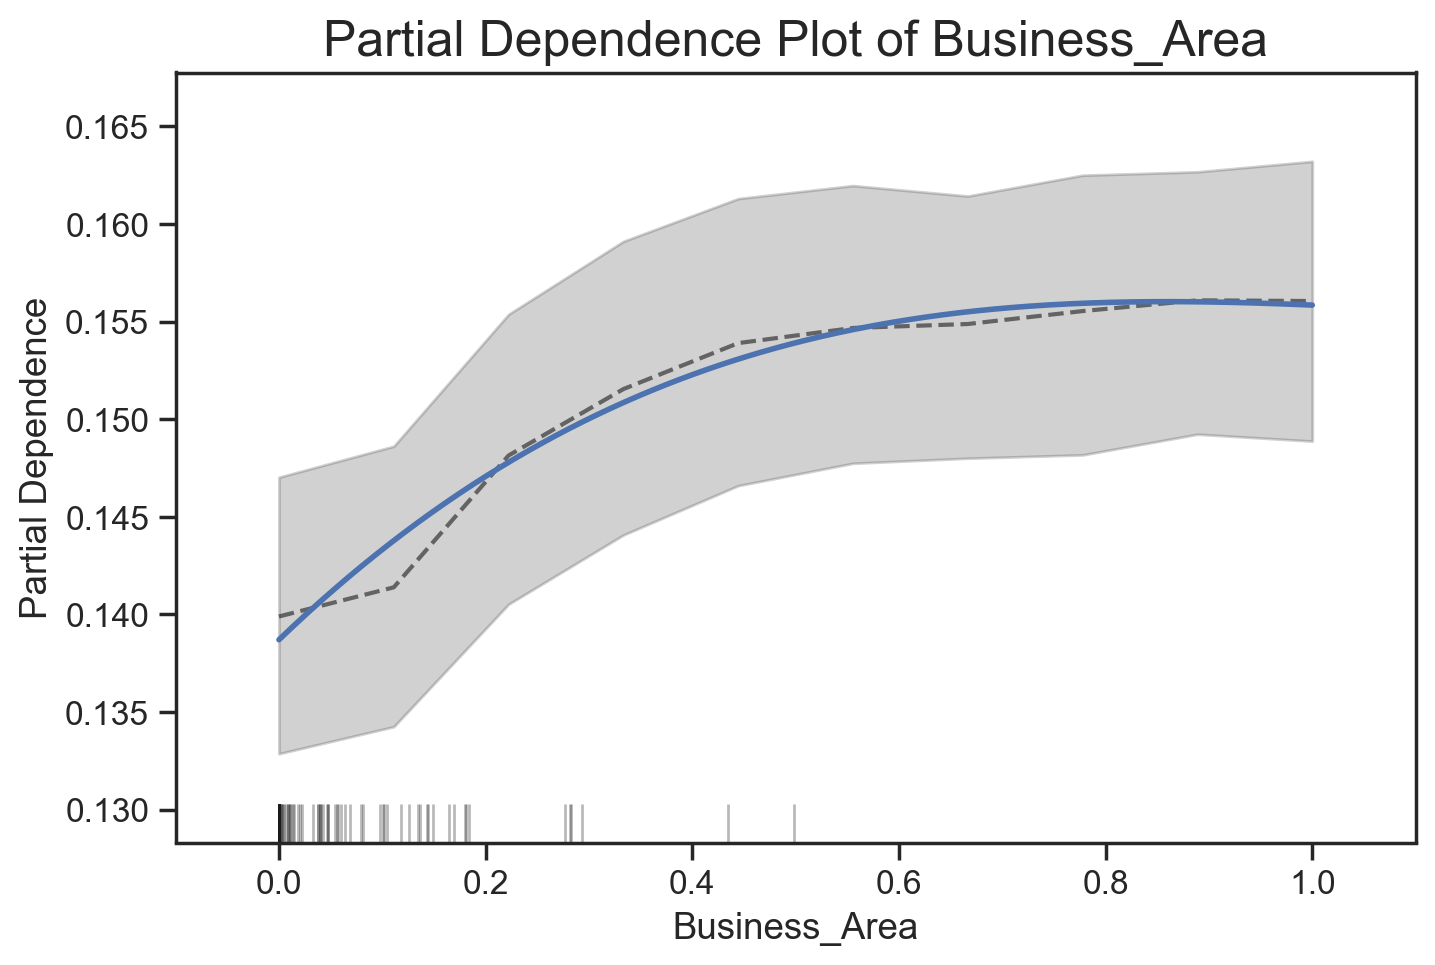

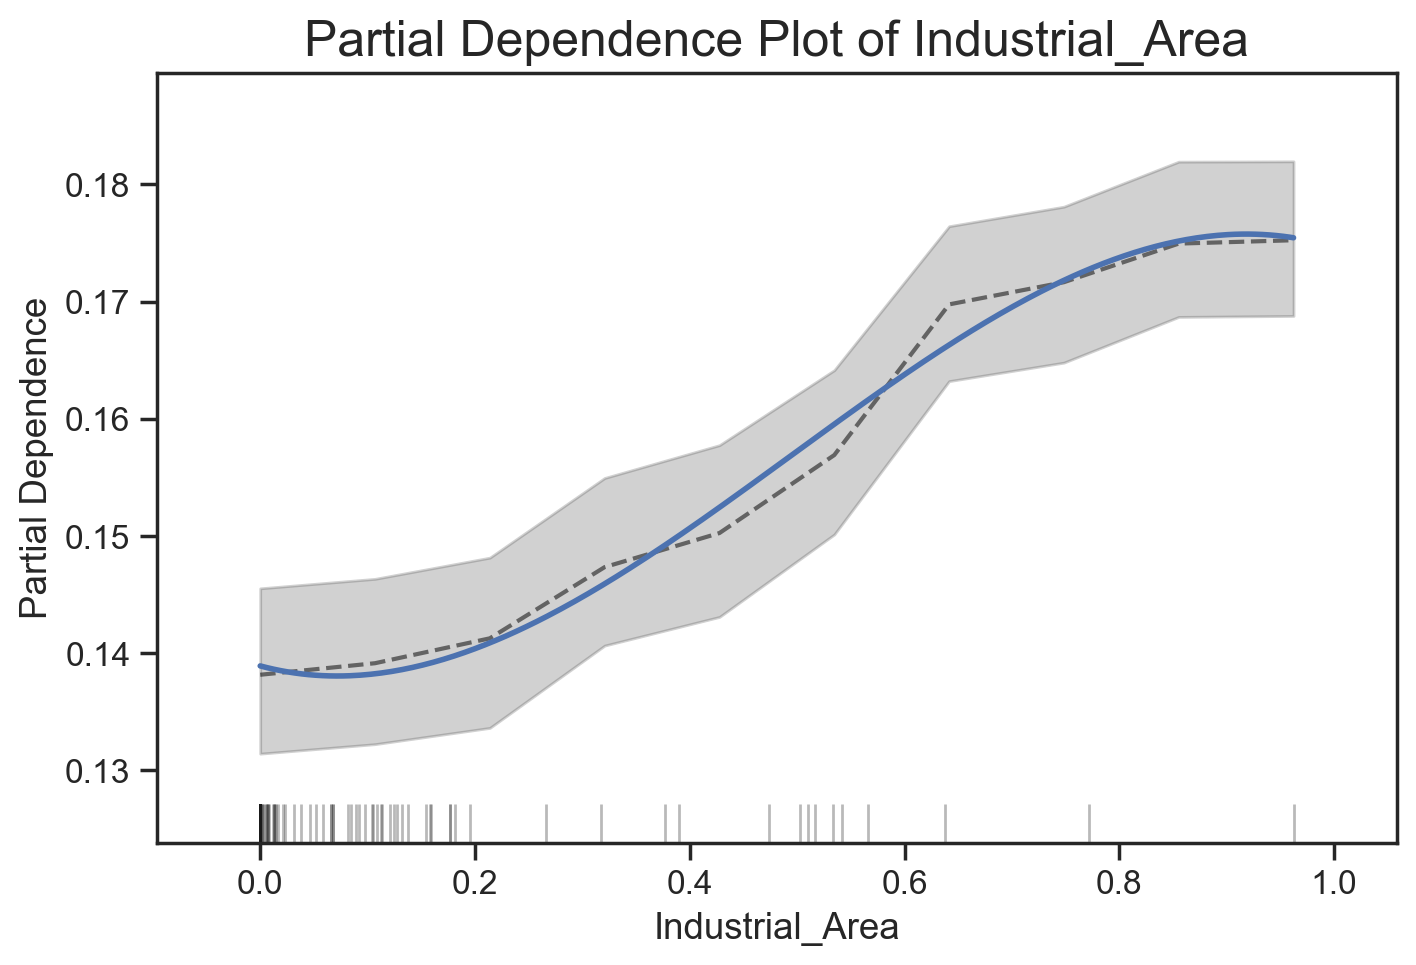

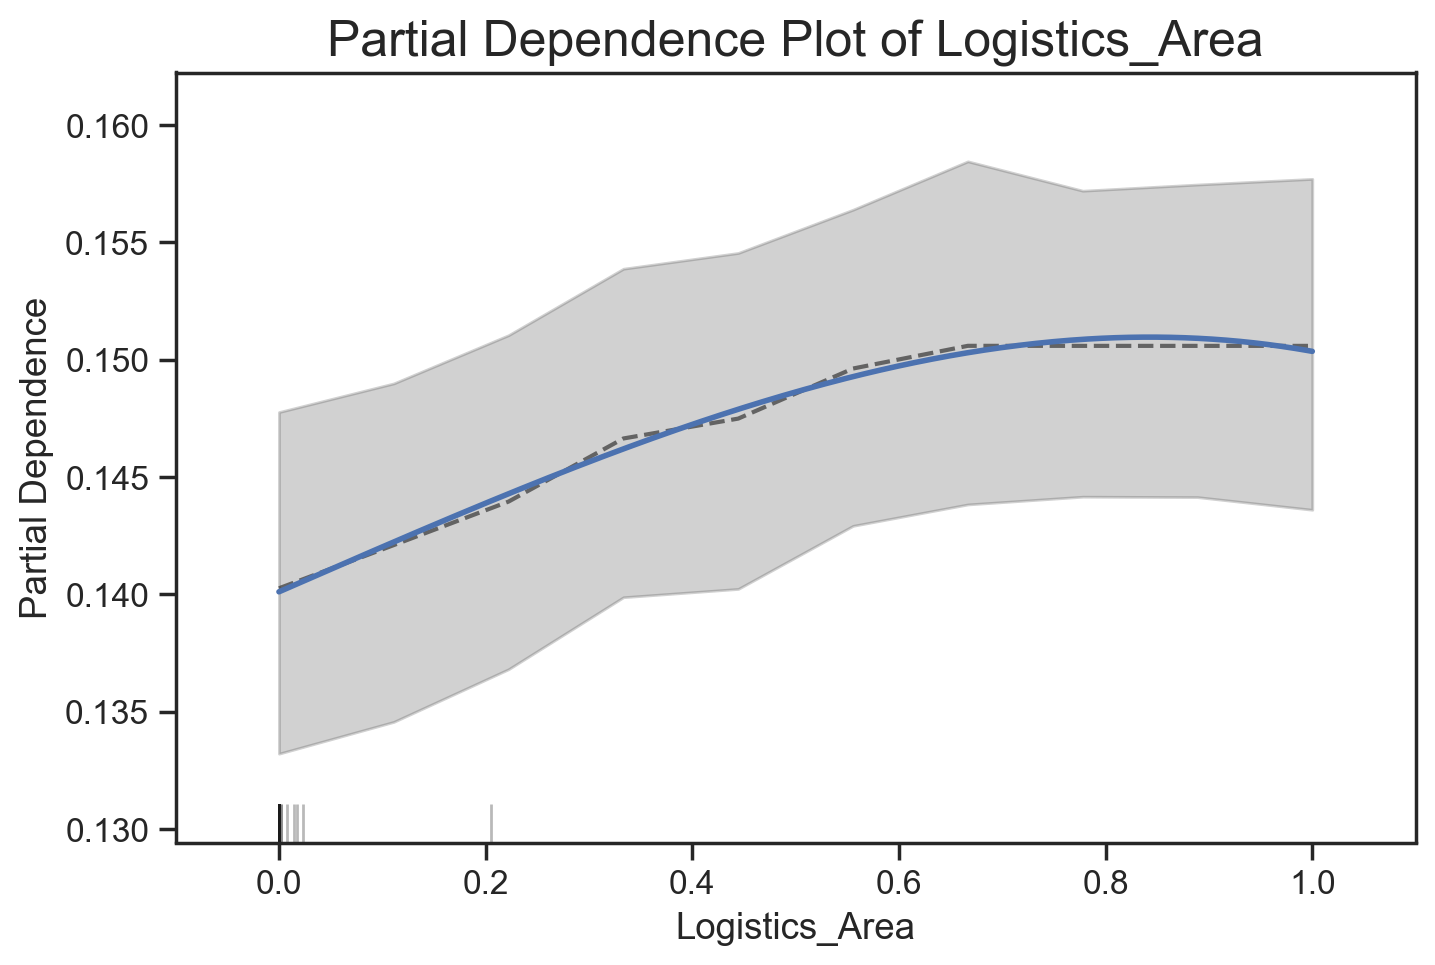

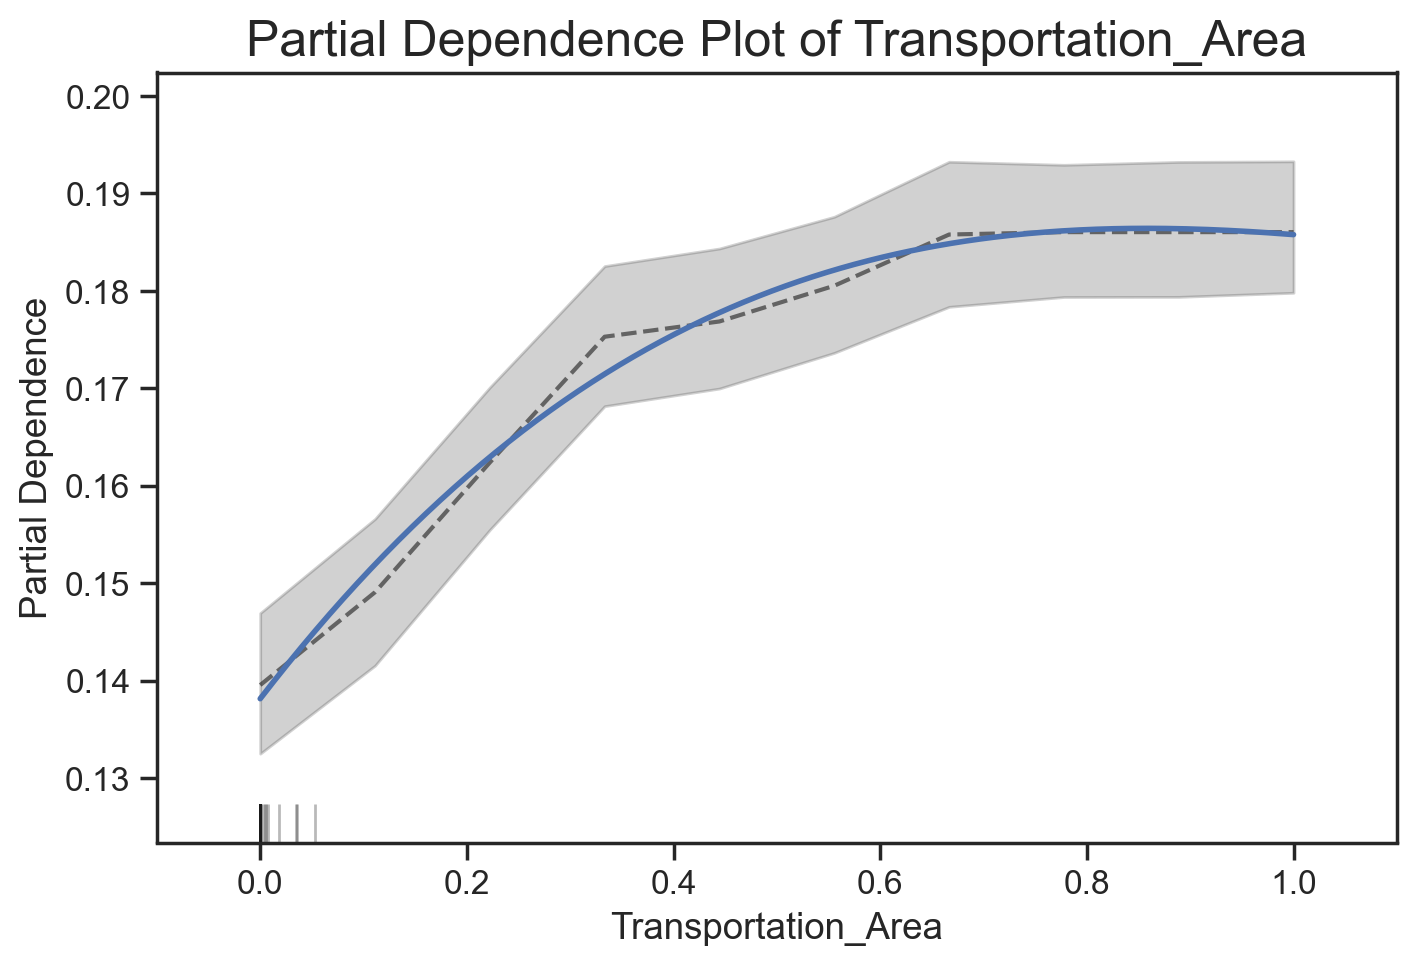

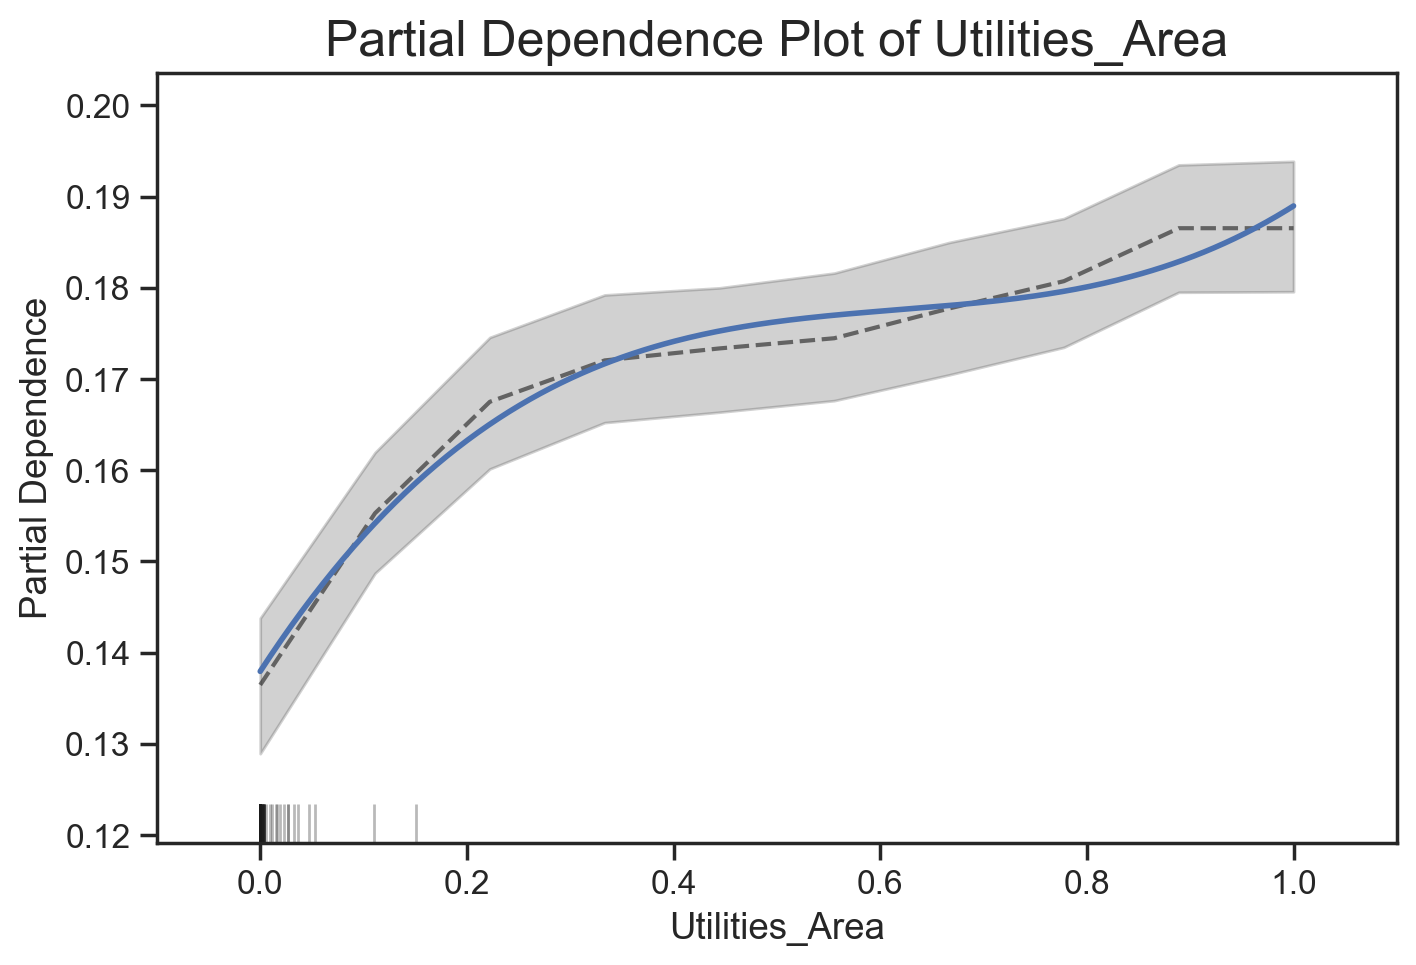

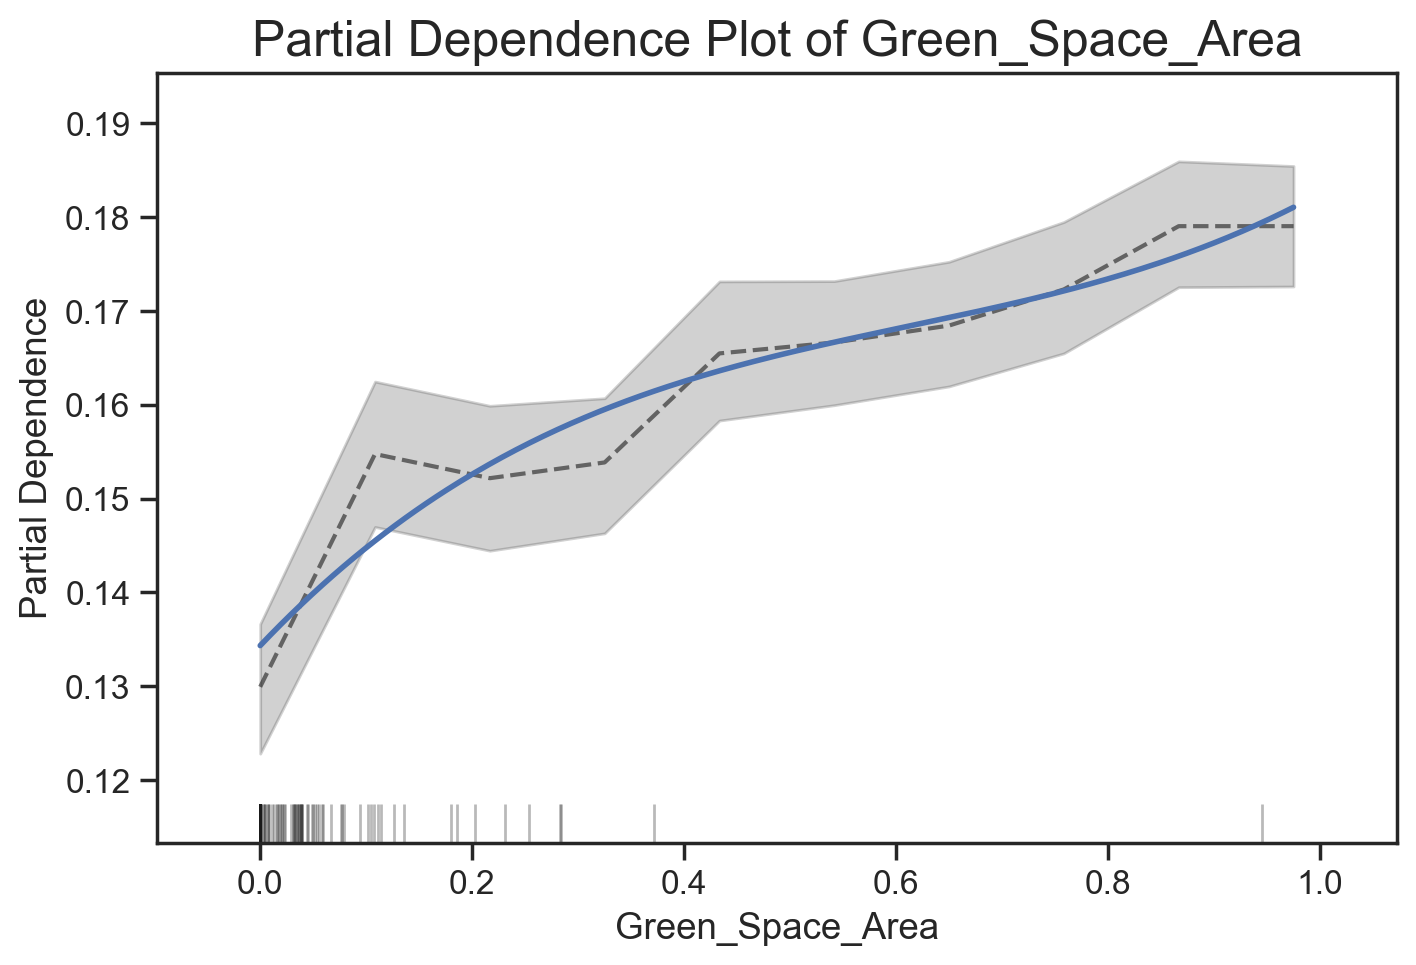

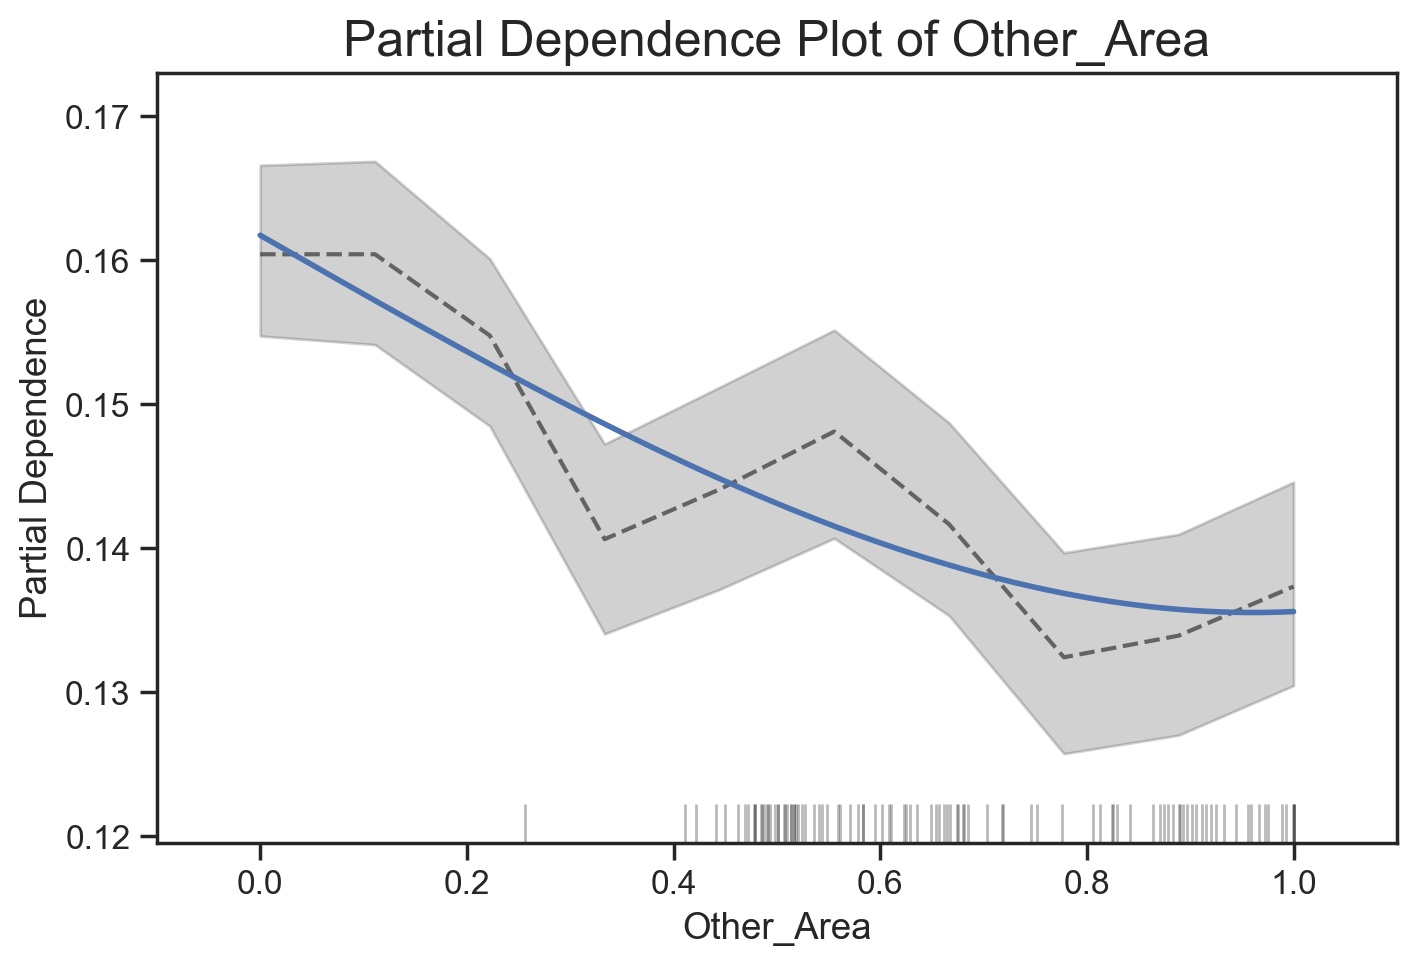

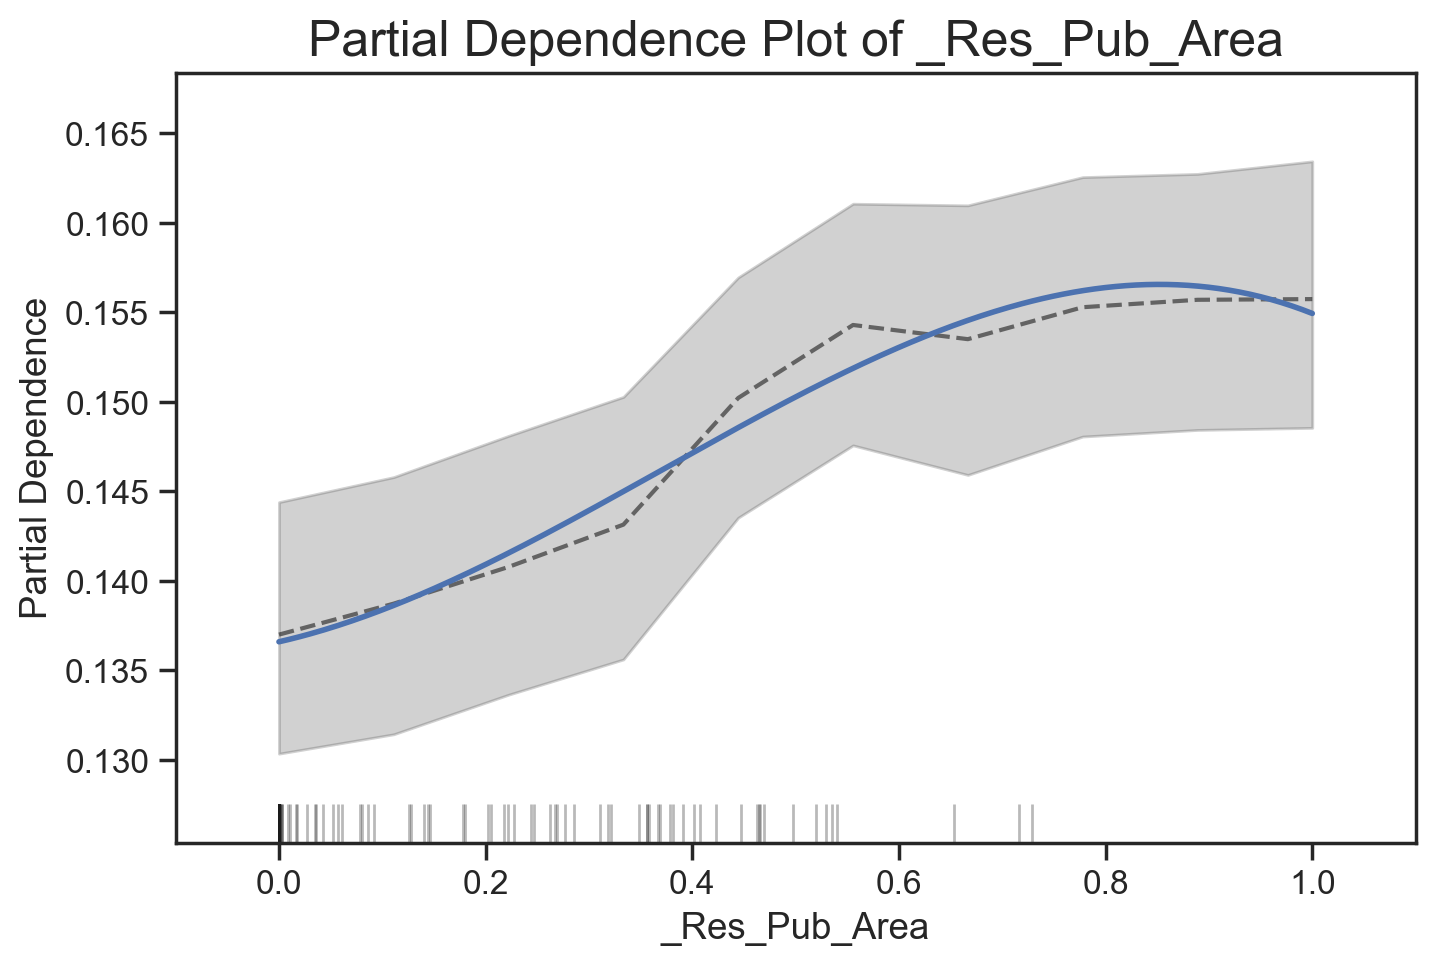

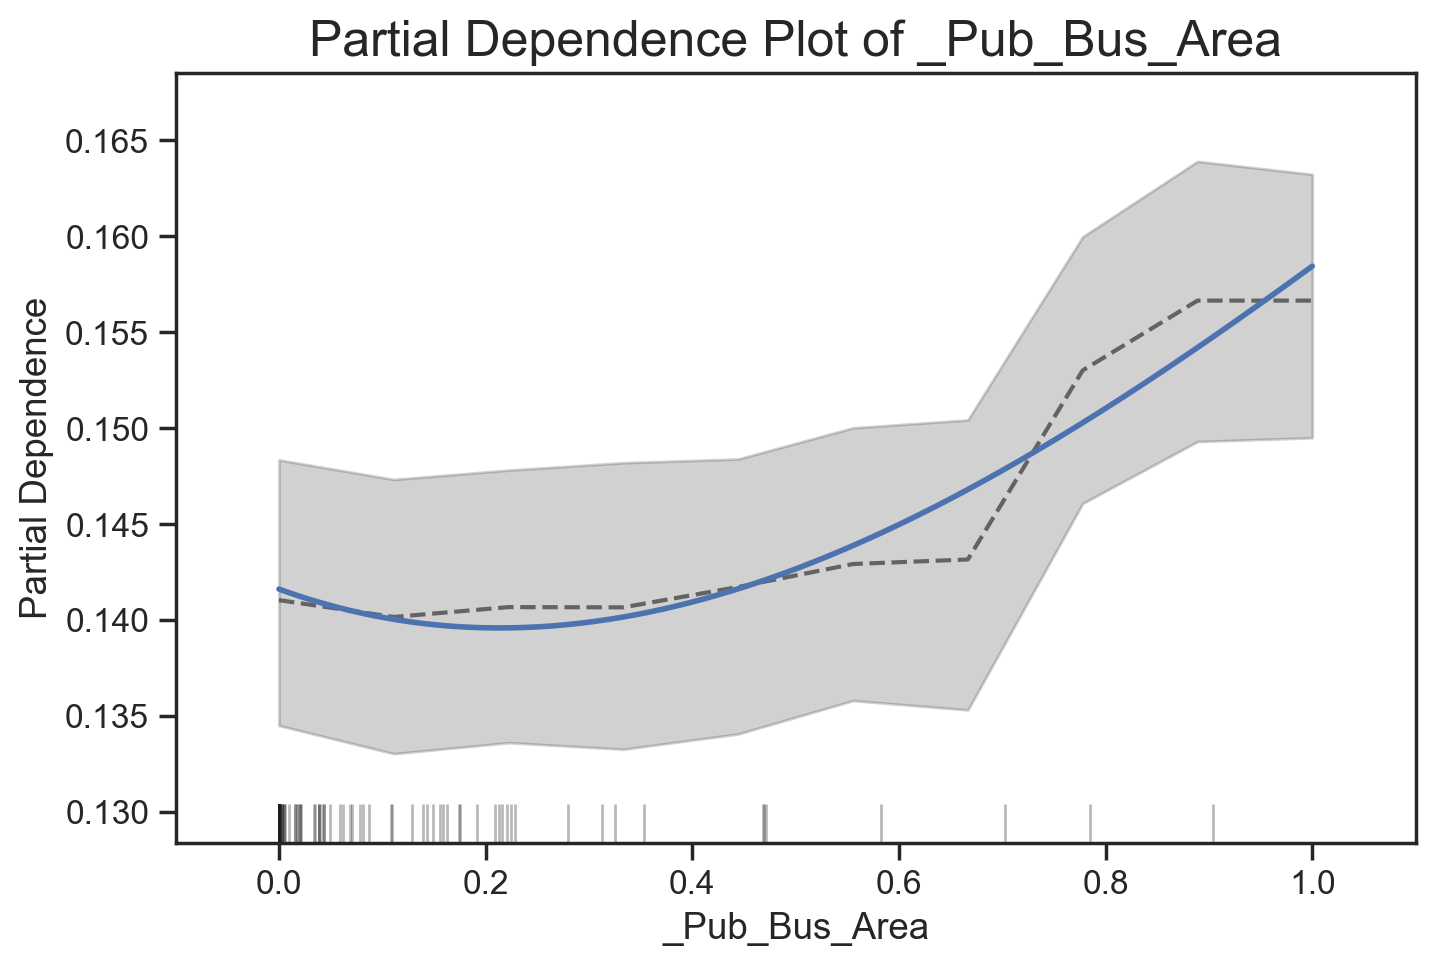

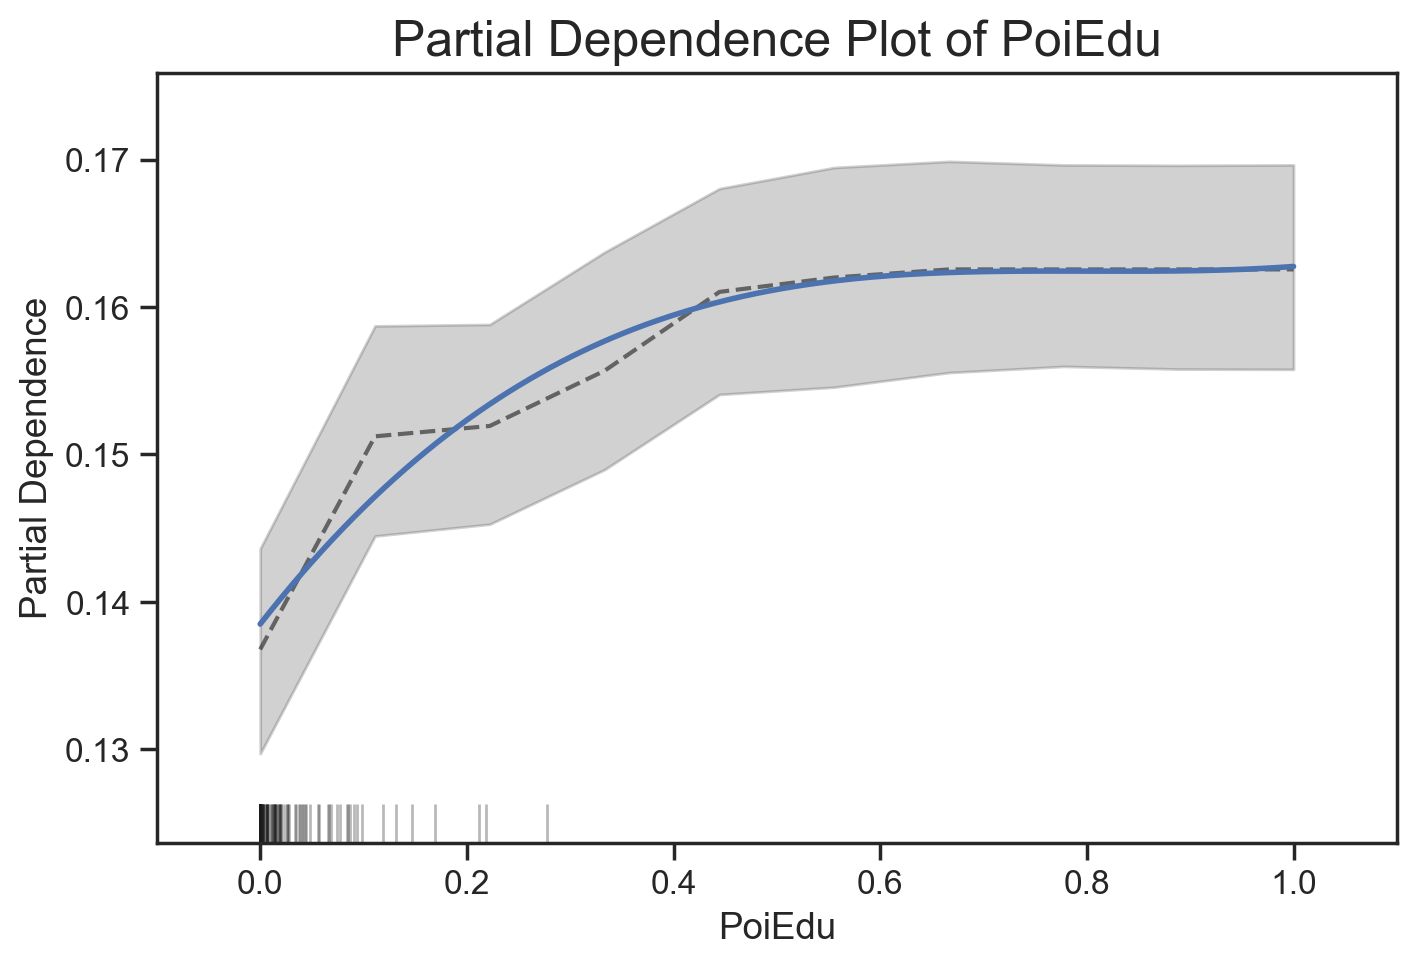

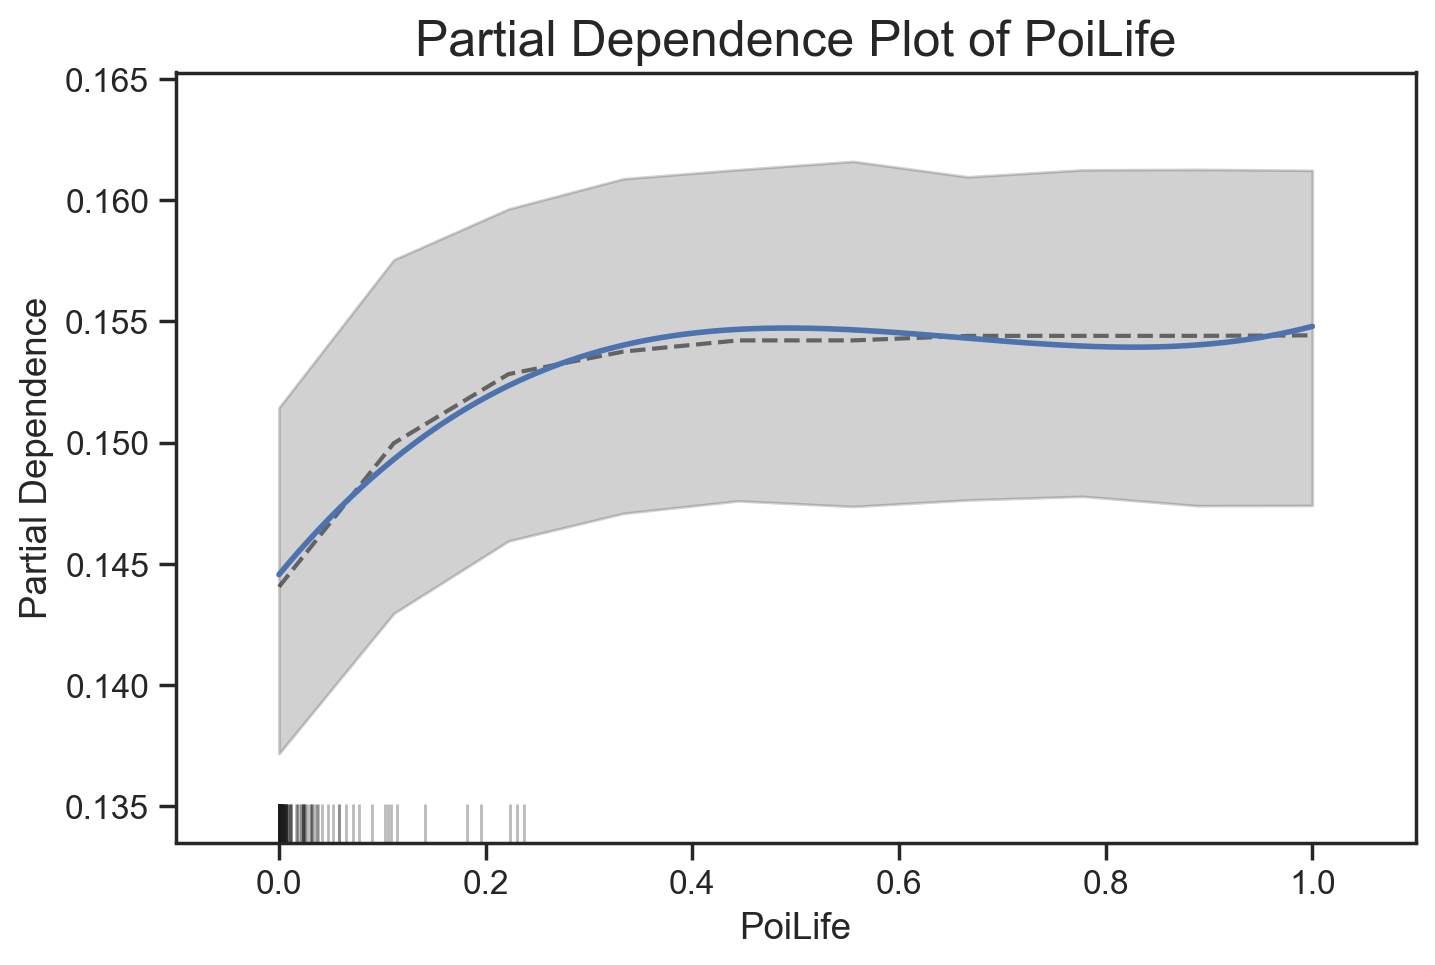

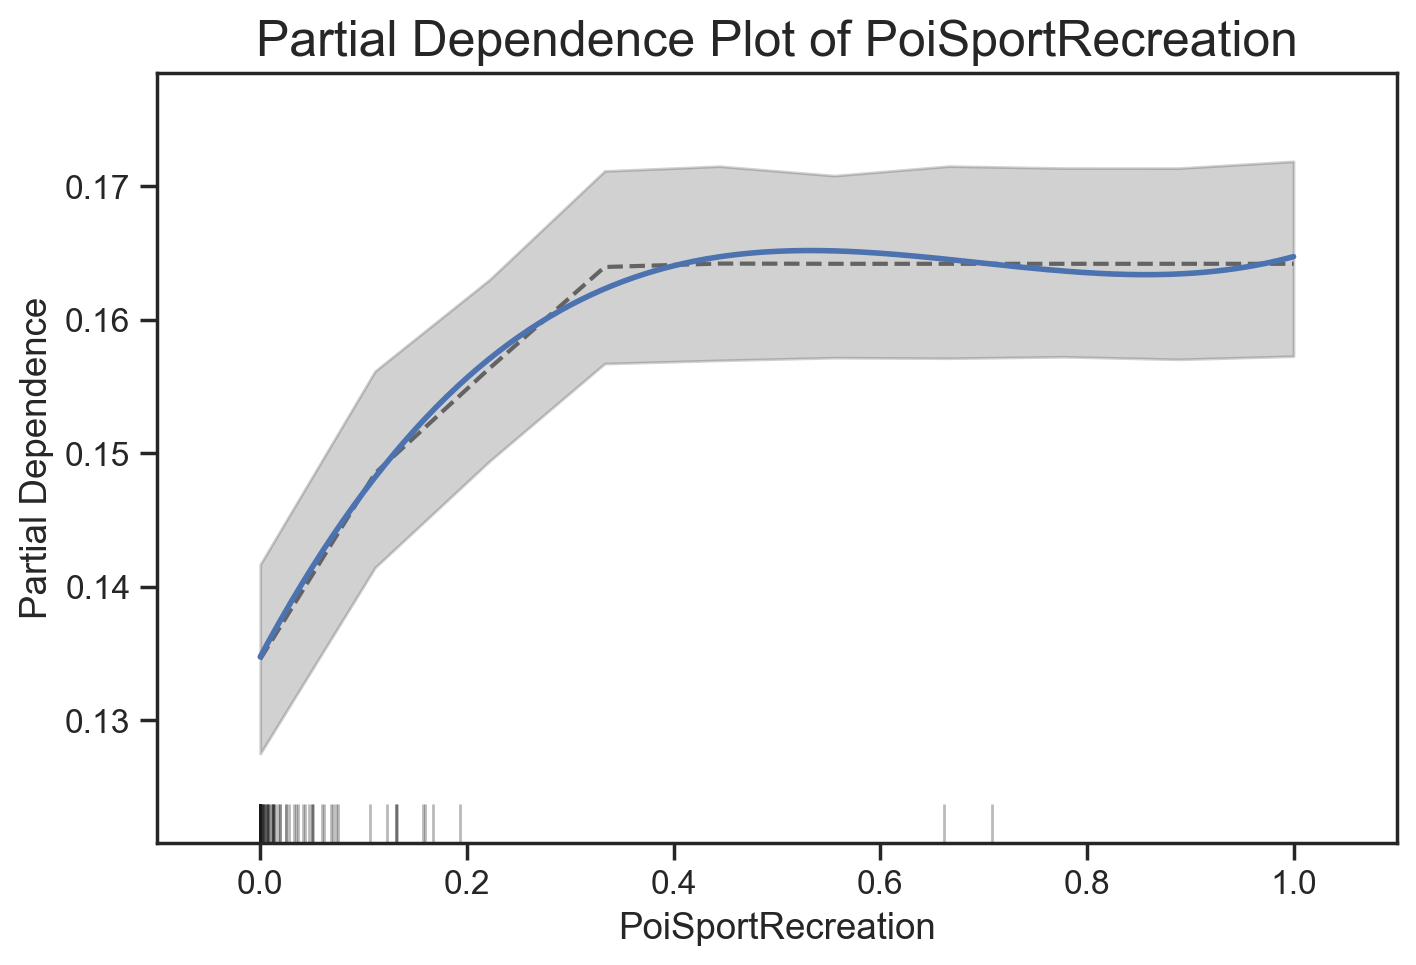

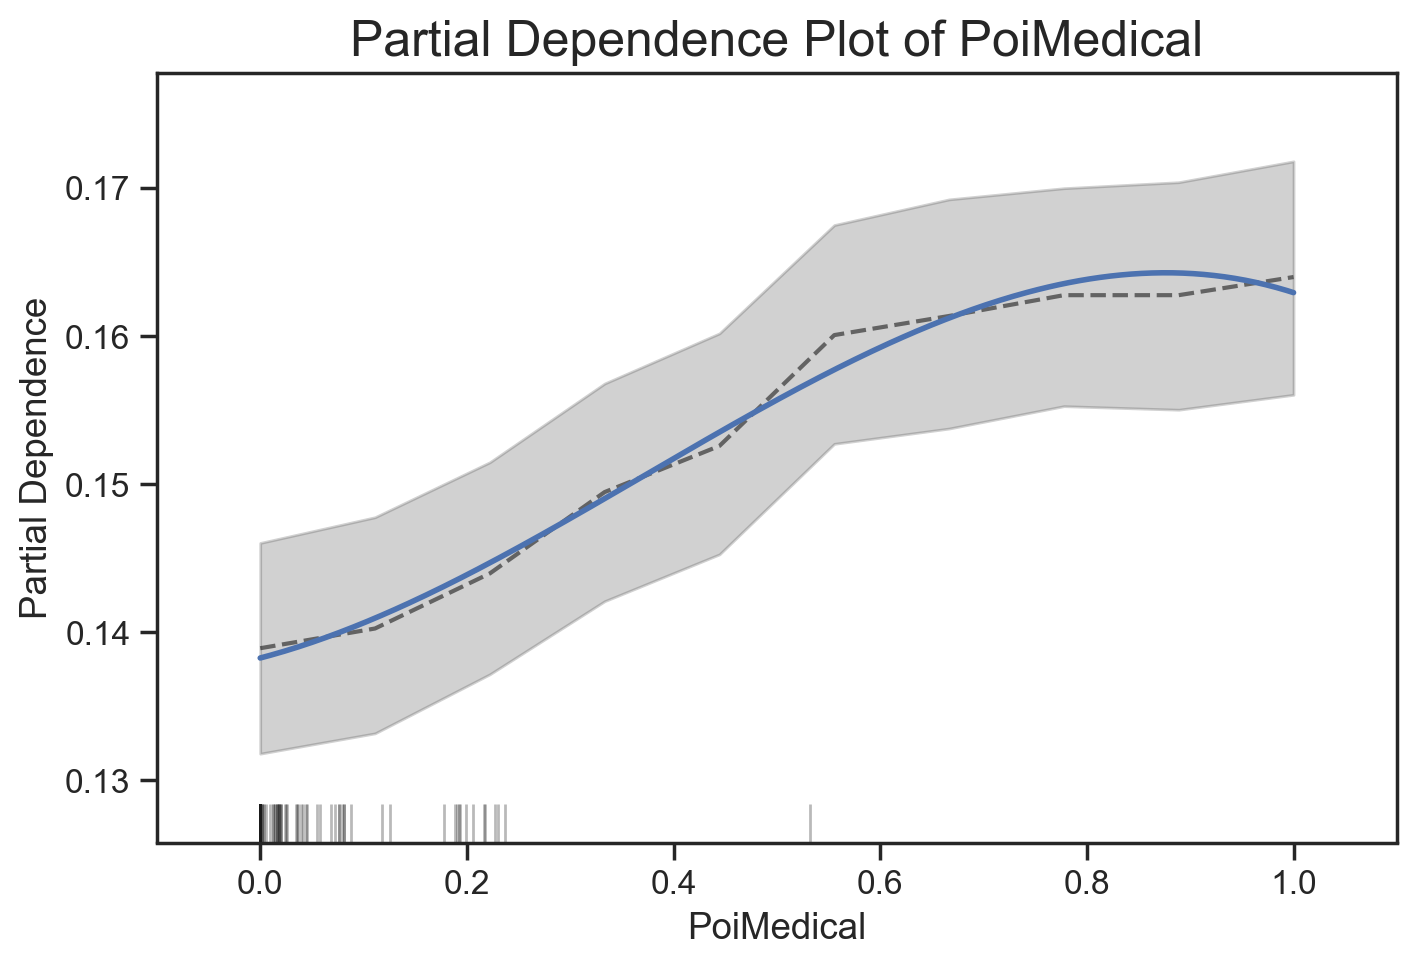

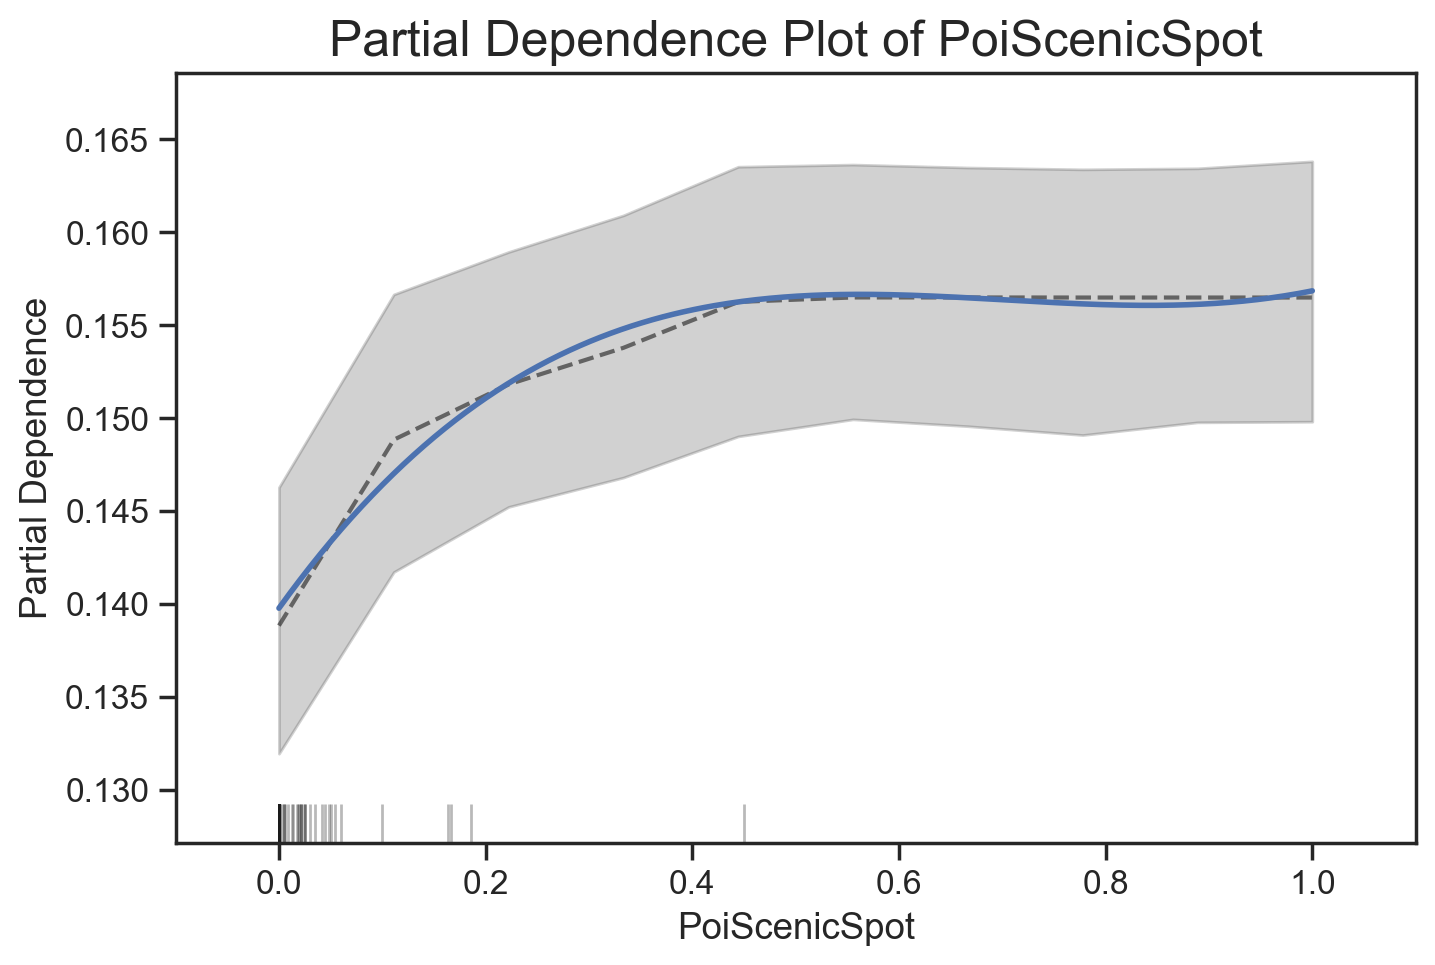

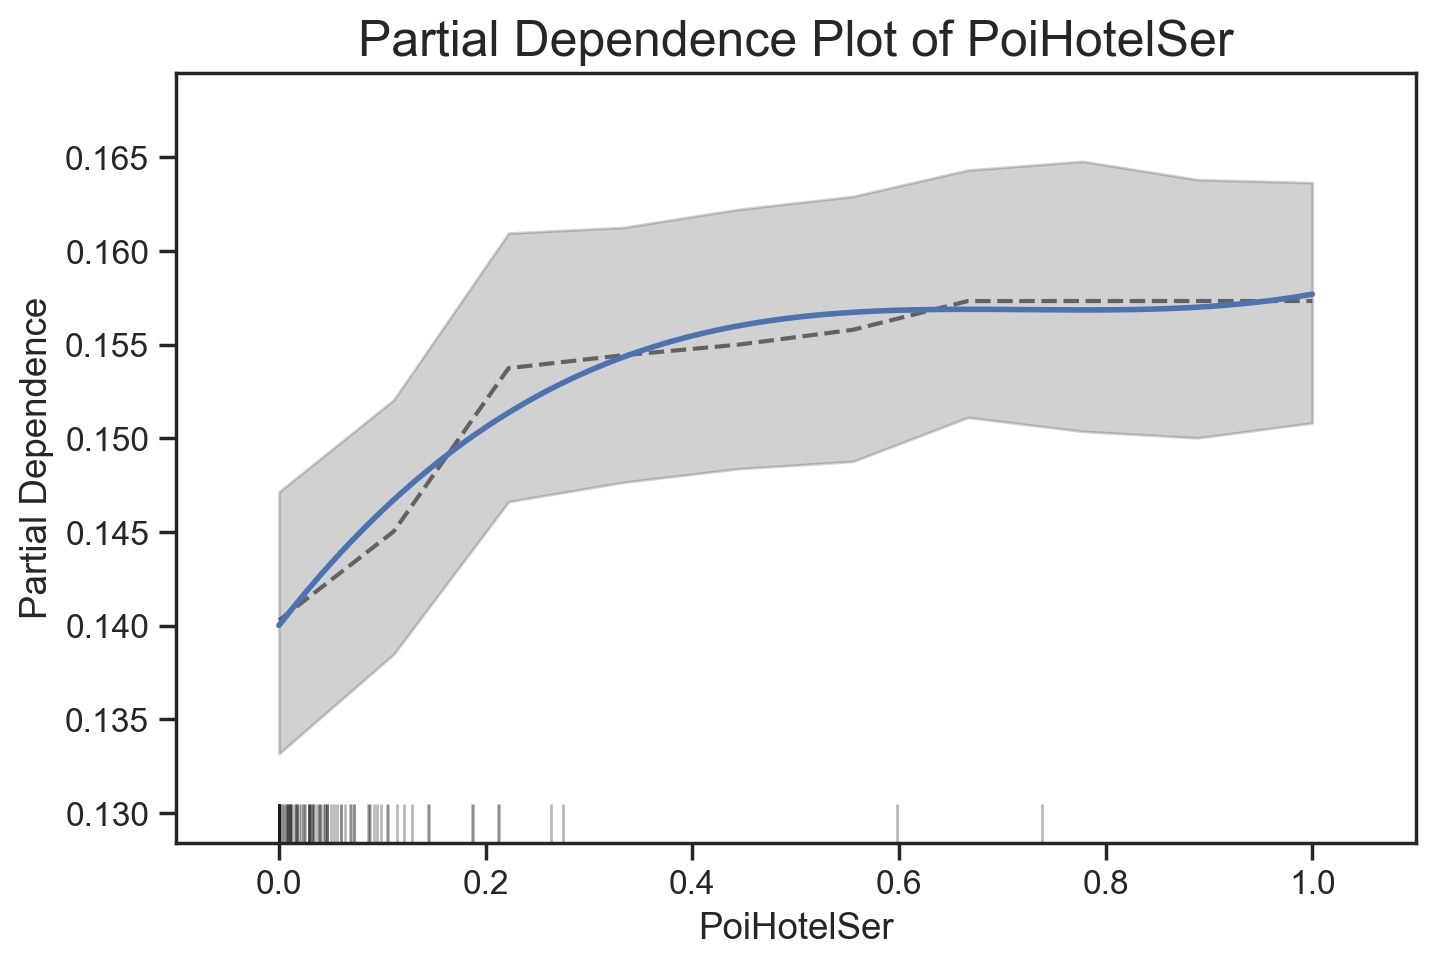

In [52]:
# List of features for Partial Dependence Plot (PDP) analysis
features = [
    'Expressway_Share', 'Arterial_Road_Share', 'Sub-Arterial_Road_Share', 'Local_Street_Share', 'Road_Density', 
    'Intersection_Density', 'FAR', 'SubwayStop_Density', 'Busstop_Density', 'Mixuse', 'Residential_Area', 
    'Public_Service_Area', 'Business_Area', 'Industrial_Area', 'Logistics_Area', 'Transportation_Area', 
    'Utilities_Area', 'Green_Space_Area', 'Other_Area', '_Res_Pub_Area', '_Pub_Bus_Area', 'PoiEdu', 'PoiLife', 
    'PoiSportRecreation', 'PoiMedical', 'PoiScenicSpot', 'PoiRetail', 'PoiCG', 'PoiHotelSer'
]

for i in features:
    # Calculate partial dependence and individual conditional expectation (ICE)
    pdp = partial_dependence(xgb_model, X_train, [i], kind="both", grid_resolution=10, percentiles=(0, 1))

    # Set theme for Seaborn plots
    sns.set_theme(style="ticks", palette="deep", font_scale=1.1)
    
    # Initialize the figure
    fig = plt.figure(figsize=(8, 5), dpi=200)
    ax = plt.subplot(111)

    # Extract x-values and ICE values
    plot_x = pd.Series(pdp['values'][0]).rename('x')
    plot_i = pdp['individual']  # ICE values for each sample
    plot_y = pdp['average'][0]  # Average PDP values

    # Smooth the average PDP curve using spline interpolation
    tck = splrep(plot_x, plot_y, s=30)
    xnew = np.linspace(plot_x.min(), plot_x.max(), 300)
    ynew = splev(xnew, tck, der=0)

    # Prepare a DataFrame to store x and y values for ICE lines
    plot_df = pd.DataFrame(columns=['x', 'y'])
    for a in plot_i[0]:  # Iterate over each ICE line
        a2 = pd.Series(a)
        df_i = pd.concat([plot_x, a2.rename('y')], axis=1)  # Combine x with ICE values
        plot_df = plot_df.append(df_i, ignore_index=True)  # Append to the overall DataFrame

    # Plot ICE lines with Seaborn
    sns.lineplot(data=plot_df, x="x", y="y", color='k', linewidth=1.5, linestyle='--', alpha=0.6)
    plt.plot(xnew, ynew, linewidth=2)  # Plot smoothed average PDP line

    # Add a rug plot to show the distribution of feature values
    sns.rugplot(data=df.sample(100), x=i, height=.05, color='k', alpha=0.3)

    # Set x-axis limits
    x_min = plot_x.min() - (plot_x.max() - plot_x.min()) * 0.1
    x_max = plot_x.max() + (plot_x.max() - plot_x.min()) * 0.1

    # Set plot titles and labels
    plt.title(f'Partial Dependence Plot of {i}', fontsize=18)
    plt.ylabel('Partial Dependence')
    plt.xlabel(i)
    plt.xlim(x_min, x_max)

    # Save the plot as a JPG file
    plt.savefig(f'./pdpplot_{i}.jpg')
    plt.show()
